In [8]:
# import the audio features
data = pd.read_pickle('audio_features.pkl')

In [10]:
int_loc_map = {14: 'beach', 11:'bus', 7: 'cafe/restaurant', 2:'car', 3:'city_center', 6:'forest_path', 1:'grocery_store', 8:'home', 12:'library', 13:'metro_station', 15:'office', 9:'park', 4:'residential_area', 5:'train', 10:'tram'}

In [12]:
data.head()

,label,mfcc_01_mean,mfcc_01_std,mfcc_02_mean,mfcc_02_std,mfcc_03_mean,mfcc_03_std,mfcc_04_mean,mfcc_04_std,mfcc_05_mean,...,rmse_mean,rmse_std,rolloff_mean,rolloff_std,spec_centoid_mean,spec_centoid_std,spec_flux_mean,spec_flux_std,zcr_mean,zcr_std
0,14,-431.829531,31.289929,135.895387,8.809357,-53.725513,5.927891,24.895814,5.725864,-3.183241,...,0.003790,0.000803,5579.098051,346.033500,3120.416928,302.216856,1.249412,0.333877,0.082505,0.019671
1,14,-436.539917,26.518017,144.580086,10.041389,-50.765986,6.809961,23.333789,6.239996,-0.538261,...,0.005367,0.002189,5121.480013,532.699615,2677.467822,423.000073,1.254992,0.343668,0.056097,0.022570
2,14,-434.430916,24.856232,137.971707,9.206689,-53.072679,6.447099,24.839483,5.899629,-2.037454,...,0.004325,0.001139,5450.023734,399.612084,2972.668779,329.724678,1.257049,0.339699,0.069154,0.020514
3,14,-429.411378,29.635465,130.319024,9.218251,-53.530134,5.817122,25.646563,6.147800,-3.226847,...,0.003940,0.001392,5783.338734,405.385235,3230.235048,301.789578,1.271621,0.412785,0.085348,0.019375
4,14,-438.519412,31.680932,129.181425,8.782248,-58.355813,6.728568,25.899696,6.163876,-4.961766,...,0.003133,0.000929,5841.843097,325.315548,3342.164413,236.548179,1.270838,0.386981,0.099330,0.013661


In [13]:
y = data['label']

In [15]:
X = data.drop('label', axis=1)

In [17]:
X.head()

,mfcc_01_mean,mfcc_01_std,mfcc_02_mean,mfcc_02_std,mfcc_03_mean,mfcc_03_std,mfcc_04_mean,mfcc_04_std,mfcc_05_mean,mfcc_05_std,...,rmse_mean,rmse_std,rolloff_mean,rolloff_std,spec_centoid_mean,spec_centoid_std,spec_flux_mean,spec_flux_std,zcr_mean,zcr_std
0,-431.829531,31.289929,135.895387,8.809357,-53.725513,5.927891,24.895814,5.725864,-3.183241,5.771691,...,0.003790,0.000803,5579.098051,346.033500,3120.416928,302.216856,1.249412,0.333877,0.082505,0.019671
1,-436.539917,26.518017,144.580086,10.041389,-50.765986,6.809961,23.333789,6.239996,-0.538261,6.159258,...,0.005367,0.002189,5121.480013,532.699615,2677.467822,423.000073,1.254992,0.343668,0.056097,0.022570
2,-434.430916,24.856232,137.971707,9.206689,-53.072679,6.447099,24.839483,5.899629,-2.037454,5.491702,...,0.004325,0.001139,5450.023734,399.612084,2972.668779,329.724678,1.257049,0.339699,0.069154,0.020514
3,-429.411378,29.635465,130.319024,9.218251,-53.530134,5.817122,25.646563,6.147800,-3.226847,5.835915,...,0.003940,0.001392,5783.338734,405.385235,3230.235048,301.789578,1.271621,0.412785,0.085348,0.019375
4,-438.519412,31.680932,129.181425,8.782248,-58.355813,6.728568,25.899696,6.163876,-4.961766,6.464432,...,0.003133,0.000929,5841.843097,325.315548,3342.164413,236.548179,1.270838,0.386981,0.099330,0.013661


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1356)

In [22]:
X_train.head()

,mfcc_01_mean,mfcc_01_std,mfcc_02_mean,mfcc_02_std,mfcc_03_mean,mfcc_03_std,mfcc_04_mean,mfcc_04_std,mfcc_05_mean,mfcc_05_std,...,rmse_mean,rmse_std,rolloff_mean,rolloff_std,spec_centoid_mean,spec_centoid_std,spec_flux_mean,spec_flux_std,zcr_mean,zcr_std
4065,-440.187558,82.527257,64.392595,30.802939,-35.776806,21.030260,41.708039,11.703217,-0.533726,12.253490,...,0.003889,0.003346,9721.266971,1787.999061,5302.897524,1035.480297,1.254196,0.801711,0.167646,0.063456
1416,-512.741784,19.889379,149.537087,14.668363,-14.520807,9.296644,50.816664,9.956619,16.900872,7.939784,...,0.005219,0.001632,4669.332709,938.561235,2167.623639,465.505843,1.220943,0.439326,0.043411,0.022282
2261,-456.054945,21.662896,205.446998,6.448543,-26.614992,8.533651,31.997193,9.615701,27.096909,6.234048,...,0.012295,0.003563,2371.500122,341.708539,1122.420405,137.324864,1.204051,0.364150,0.017761,0.006143
2173,-549.517751,10.961404,191.978345,8.297782,-4.994147,6.922257,32.207744,6.121659,21.103760,6.014747,...,0.005182,0.001053,2075.805777,480.966629,1216.923590,178.405499,1.221205,0.299320,0.019082,0.007279
3326,-441.079252,26.010250,172.588627,12.746169,55.294870,16.623113,25.539507,9.572419,25.285492,6.527616,...,0.046476,0.022036,485.171544,294.009338,398.186692,142.897878,1.113851,0.439893,0.004888,0.002192


In [23]:
y_train.head()

4065     8
1416     1
2261    13
2173    13
3326    10
Name: label, dtype: int64

In [24]:
# pre-process the data
from sklearn import preprocessing

# standard scaling
std_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

# min max scaling
minmax_scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_minmax = minmax_scaler.transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

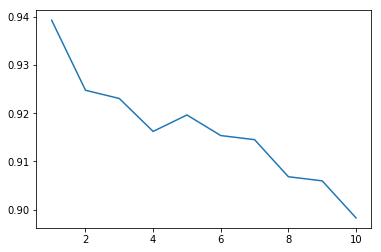

In [40]:
# k nearest neighbours
from sklearn.neighbors import KNeighborsClassifier

scores=[]

for i in range(1, 11):
    neigh=KNeighborsClassifier(n_neighbors = i)
    neigh.fit(X_train_std, y_train)
    scores += [neigh.score(X_test_std, y_test)]
    
plt.plot(np.arange(1, 11), scores)

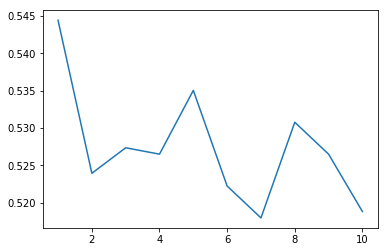

In [41]:
# the same but without preprocessing

scores=[]

for i in range(1, 11):
    neigh=KNeighborsClassifier(n_neighbors = i)
    neigh.fit(X_train, y_train)
    scores += [neigh.score(X_test, y_test)]
    
plt.plot(np.arange(1, 11), scores)

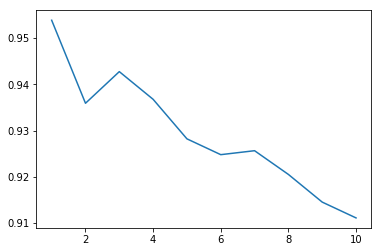

In [42]:
# the same but minmax scaling
scores=[]

for i in range(1, 11):
    neigh=KNeighborsClassifier(n_neighbors = i)
    neigh.fit(X_train_minmax, y_train)
    scores += [neigh.score(X_test_minmax, y_test)]
    
plt.plot(np.arange(1, 11), scores)

In [57]:
neigh=KNeighborsClassifier(n_neighbors = 1)
neigh.fit(X_train_minmax, y_train)
print(neigh.score(X_test_minmax, y_test))

0.9538461538461539


In [58]:
loc_int_map = {int_loc_map[i]:i for i in int_loc_map.keys()}

In [64]:
# save the mappings to and from for convenience

import pickle

f1 = open('locintmap.pkl', 'wb')
f2 = open('intlocmap.pkl', 'wb')

pickle.dump(loc_int_map, f1)
pickle.dump(int_loc_map, f2)

f1.close()
f2.close()

In [92]:
from sklearn.metrics import precision_recall_fscore_support as metrics

mdf = pd.DataFrame(list(metrics(y_test, neigh.predict(X_test_minmax))))
mdf.columns = range(1,16)
mdf = mdf.rename(columns=int_loc_map)
mdf = mdf.rename(index={0:'precision', 1:'recall', 2:'fscore', 3:'support'})

In [126]:
from IPython.display import display

# create a helper function to print the following
def showmetrics(X_test, y_test, classifier):
    mdf = pd.DataFrame(list(metrics(y_test, classifier.predict(X_test))))
    mdf.columns = range(1,16)
    mdf = mdf.rename(columns = int_loc_map)
    mdf = mdf.rename(index={0:'precision', 1:'recall', 2:'fscore', 3:'support'})
    print("Average precision: {:.3f}".format(mdf.loc['precision'].mean()))
    print("Average recall: {:.3f}".format(mdf.loc['recall'].mean()))
    print("Average fscore: {:.3f}".format(mdf.loc['fscore'].mean()))
    display(mdf)

In [106]:
showmetrics(X_test_minmax, y_test, neigh)

,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.927835,0.982143,0.891566,1.000000,0.972603,1.000000,0.917526,0.978022,0.950000,0.901235,1.000000,0.925373,0.934426,0.947368,1.000000
recall,0.957447,0.932203,0.973684,0.806818,0.972603,0.976471,0.956989,0.946809,0.974359,0.948052,0.962500,1.000000,1.000000,0.972973,0.962500
fscore,0.942408,0.956522,0.930818,0.893082,0.972603,0.988095,0.936842,0.962162,0.962025,0.924051,0.980892,0.961240,0.966102,0.960000,0.980892
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


In [127]:
# create a helper function that trains, tests and prints the metrics
def train_test_report(X_train, y_train, X_test, y_test, classifier):
    classifier.fit(X_train, y_train)
    print("Accuracy: {:.3f}".format(classifier.score(X_test, y_test)))
    showmetrics(X_test, y_test, classifier)

In [129]:
# the output for the k-nearest neighbours (1 neighbour)
train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, neigh)

Accuracy: 0.954
Average precision: 0.955
Average recall: 0.956
Average fscore: 0.955


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.927835,0.982143,0.891566,1.000000,0.972603,1.000000,0.917526,0.978022,0.950000,0.901235,1.000000,0.925373,0.934426,0.947368,1.000000
recall,0.957447,0.932203,0.973684,0.806818,0.972603,0.976471,0.956989,0.946809,0.974359,0.948052,0.962500,1.000000,1.000000,0.972973,0.962500
fscore,0.942408,0.956522,0.930818,0.893082,0.972603,0.988095,0.936842,0.962162,0.962025,0.924051,0.980892,0.961240,0.966102,0.960000,0.980892
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


In [137]:
# logistic regression
from sklearn.linear_model import LogisticRegression

logre = LogisticRegression(solver='lbfgs', max_iter=200)

print("Without preprocessing")
train_test_report(X_train, y_train, X_test, y_test, logre)
print()
print("Standard scaling")
train_test_report(X_train_std, y_train, X_test_std, y_test, logre)
print()
print("Minmax scaling")
train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, logre)

Without preprocessing
Accuracy: 0.785
Average precision: 0.780
Average recall: 0.785
Average fscore: 0.778


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.882979,0.852459,0.791209,0.812500,0.600000,0.918605,0.715686,0.843373,0.747126,0.666667,0.807692,0.681159,0.700000,0.838710,0.838710
recall,0.882979,0.881356,0.947368,0.590909,0.452055,0.929412,0.784946,0.744681,0.833333,0.649351,0.787500,0.758065,0.859649,0.702703,0.975000
fscore,0.882979,0.866667,0.862275,0.684211,0.515625,0.923977,0.748718,0.790960,0.787879,0.657895,0.797468,0.717557,0.771654,0.764706,0.901734
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Standard scaling
Accuracy: 0.857
Average precision: 0.853
Average recall: 0.859
Average fscore: 0.854


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.945055,0.903226,0.873563,0.815789,0.758065,0.952381,0.819149,0.951220,0.779070,0.753425,0.892857,0.800000,0.753623,0.885714,0.917647
recall,0.914894,0.949153,1.000000,0.704545,0.643836,0.941176,0.827957,0.829787,0.858974,0.714286,0.937500,0.838710,0.912281,0.837838,0.975000
fscore,0.929730,0.925620,0.932515,0.756098,0.696296,0.946746,0.823529,0.886364,0.817073,0.733333,0.914634,0.818898,0.825397,0.861111,0.945455
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.806
Average precision: 0.800
Average recall: 0.805
Average fscore: 0.799


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.841584,0.787879,0.902439,0.833333,0.679245,0.952941,0.818182,0.857143,0.764045,0.623377,0.811765,0.711864,0.675325,0.887097,0.855556
recall,0.904255,0.881356,0.973684,0.681818,0.493151,0.952941,0.774194,0.765957,0.871795,0.623377,0.862500,0.677419,0.912281,0.743243,0.962500
fscore,0.871795,0.832000,0.936709,0.750000,0.571429,0.952941,0.795580,0.808989,0.814371,0.623377,0.836364,0.694215,0.776119,0.808824,0.905882
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


In [139]:
# naive-bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

print("Without preprocessing")
train_test_report(X_train, y_train, X_test, y_test, gnb)
print()
print("Standard scaling")
train_test_report(X_train_std, y_train, X_test_std, y_test, gnb)
print()
print("Minmax scaling")
train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, gnb)

Without preprocessing
Accuracy: 0.669
Average precision: 0.683
Average recall: 0.665
Average fscore: 0.662


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.690000,0.648649,0.736264,0.844444,0.553191,0.931507,0.629213,0.621622,0.425373,0.691176,0.777778,0.520000,0.631579,0.700000,0.851351
recall,0.734043,0.813559,0.881579,0.431818,0.356164,0.800000,0.602151,0.734043,0.730769,0.610390,0.787500,0.629032,0.421053,0.662162,0.787500
fscore,0.711340,0.721805,0.802395,0.571429,0.433333,0.860759,0.615385,0.673171,0.537736,0.648276,0.782609,0.569343,0.505263,0.680556,0.818182
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Standard scaling
Accuracy: 0.662
Average precision: 0.676
Average recall: 0.656
Average fscore: 0.652


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.669903,0.631579,0.770115,0.844444,0.617021,0.942029,0.582418,0.657407,0.408163,0.650794,0.741176,0.550000,0.552632,0.671429,0.851852
recall,0.734043,0.813559,0.881579,0.431818,0.397260,0.764706,0.569892,0.755319,0.769231,0.532468,0.787500,0.532258,0.368421,0.635135,0.862500
fscore,0.700508,0.711111,0.822086,0.571429,0.483333,0.844156,0.576087,0.702970,0.533333,0.585714,0.763636,0.540984,0.442105,0.652778,0.857143
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.662
Average precision: 0.676
Average recall: 0.656
Average fscore: 0.652


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.669903,0.631579,0.770115,0.844444,0.617021,0.942029,0.582418,0.657407,0.408163,0.650794,0.741176,0.550000,0.552632,0.671429,0.851852
recall,0.734043,0.813559,0.881579,0.431818,0.397260,0.764706,0.569892,0.755319,0.769231,0.532468,0.787500,0.532258,0.368421,0.635135,0.862500
fscore,0.700508,0.711111,0.822086,0.571429,0.483333,0.844156,0.576087,0.702970,0.533333,0.585714,0.763636,0.540984,0.442105,0.652778,0.857143
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


In [141]:
# svm
from sklearn import svm

svm = svm.SVC()

print("Without preprocessing")
train_test_report(X_train, y_train, X_test, y_test, svm)
print()
print("Standard scaling")
train_test_report(X_train_std, y_train, X_test_std, y_test, svm)
print()
print("Minmax scaling")
train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, svm)

Without preprocessing
Accuracy: 0.056
Average precision: 0.137
Average recall: 0.075
Average fscore: 0.022


c:\users\jerem_000\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.049053,0.0,0.0
recall,0.0,0.118644,0.0,0.0,0.013699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0
fscore,0.0,0.212121,0.0,0.0,0.027027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.093519,0.0,0.0
support,94.0,59.000000,76.0,88.0,73.000000,85.0,93.0,94.0,78.0,77.0,80.0,62.0,57.000000,74.0,80.0



Standard scaling
Accuracy: 0.947
Average precision: 0.945
Average recall: 0.948
Average fscore: 0.946


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.978947,0.918033,0.987013,0.963415,0.885714,0.976190,0.967742,0.988636,0.903614,0.860759,0.935897,0.898551,0.919355,1.000000,0.987342
recall,0.989362,0.949153,1.000000,0.897727,0.849315,0.964706,0.967742,0.925532,0.961538,0.883117,0.912500,1.000000,1.000000,0.945946,0.975000
fscore,0.984127,0.933333,0.993464,0.929412,0.867133,0.970414,0.967742,0.956044,0.931677,0.871795,0.924051,0.946565,0.957983,0.972222,0.981132
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.707
Average precision: 0.725
Average recall: 0.709
Average fscore: 0.697


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.804124,0.710145,0.811111,0.866667,0.666667,0.916667,0.766234,0.785714,0.558559,0.560440,0.780488,0.417476,0.511111,0.901961,0.818182
recall,0.829787,0.830508,0.960526,0.443182,0.273973,0.905882,0.634409,0.702128,0.794872,0.662338,0.800000,0.693548,0.807018,0.621622,0.675000
fscore,0.816754,0.765625,0.879518,0.586466,0.388350,0.911243,0.694118,0.741573,0.656085,0.607143,0.790123,0.521212,0.625850,0.736000,0.739726
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


In [146]:
# svm
from sklearn.svm import SVC

# trying various C
for c in [0.01, 0.1, 1, 10, 100]:
    print("C parameter: {}".format(c))
    svm = SVC(C=c)

    print("Standard scaling")
    train_test_report(X_train_std, y_train, X_test_std, y_test, svm)
    print()
    print("Minmax scaling")
    train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, svm)

C parameter: 0.01
Standard scaling
Accuracy: 0.110
Average precision: 0.106
Average recall: 0.143
Average fscore: 0.066


c:\users\jerem_000\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.0,0.307229,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.225000,0.059874,0.0,0.0
recall,0.0,0.864407,0.0,0.0,0.0,0.141176,0.0,0.0,0.0,0.0,0.0,0.145161,1.000000,0.0,0.0
fscore,0.0,0.453333,0.0,0.0,0.0,0.247423,0.0,0.0,0.0,0.0,0.0,0.176471,0.112983,0.0,0.0
support,94.0,59.000000,76.0,88.0,73.0,85.000000,93.0,94.0,78.0,77.0,80.0,62.000000,57.000000,74.0,80.0



Minmax scaling
Accuracy: 0.049
Average precision: 0.003
Average recall: 0.067
Average fscore: 0.006


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048718,0.0,0.0
recall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0
fscore,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.092910,0.0,0.0
support,94.0,59.0,76.0,88.0,73.0,85.0,93.0,94.0,78.0,77.0,80.0,62.0,57.000000,74.0,80.0


C parameter: 0.1
Standard scaling
Accuracy: 0.815
Average precision: 0.819
Average recall: 0.815
Average fscore: 0.812


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.892473,0.833333,0.912500,0.888889,0.736111,0.950617,0.888889,0.762376,0.680412,0.701149,0.886076,0.700000,0.644737,0.950000,0.858824
recall,0.882979,0.762712,0.960526,0.636364,0.726027,0.905882,0.688172,0.819149,0.846154,0.792208,0.875000,0.790323,0.859649,0.770270,0.912500
fscore,0.887701,0.796460,0.935897,0.741722,0.731034,0.927711,0.775758,0.789744,0.754286,0.743902,0.880503,0.742424,0.736842,0.850746,0.884848
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.115
Average precision: 0.107
Average recall: 0.144
Average fscore: 0.063


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.0,0.251185,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.285714,0.061290,0.0,0.0
recall,0.0,0.898305,0.0,0.0,0.0,0.0,0.0,0.234043,0.0,0.0,0.0,0.032258,1.000000,0.0,0.0
fscore,0.0,0.392593,0.0,0.0,0.0,0.0,0.0,0.379310,0.0,0.0,0.0,0.057971,0.115502,0.0,0.0
support,94.0,59.000000,76.0,88.0,73.0,85.0,93.0,94.000000,78.0,77.0,80.0,62.000000,57.000000,74.0,80.0


C parameter: 1
Standard scaling
Accuracy: 0.947
Average precision: 0.945
Average recall: 0.948
Average fscore: 0.946


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.978947,0.918033,0.987013,0.963415,0.885714,0.976190,0.967742,0.988636,0.903614,0.860759,0.935897,0.898551,0.919355,1.000000,0.987342
recall,0.989362,0.949153,1.000000,0.897727,0.849315,0.964706,0.967742,0.925532,0.961538,0.883117,0.912500,1.000000,1.000000,0.945946,0.975000
fscore,0.984127,0.933333,0.993464,0.929412,0.867133,0.970414,0.967742,0.956044,0.931677,0.871795,0.924051,0.946565,0.957983,0.972222,0.981132
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.707
Average precision: 0.725
Average recall: 0.709
Average fscore: 0.697


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.804124,0.710145,0.811111,0.866667,0.666667,0.916667,0.766234,0.785714,0.558559,0.560440,0.780488,0.417476,0.511111,0.901961,0.818182
recall,0.829787,0.830508,0.960526,0.443182,0.273973,0.905882,0.634409,0.702128,0.794872,0.662338,0.800000,0.693548,0.807018,0.621622,0.675000
fscore,0.816754,0.765625,0.879518,0.586466,0.388350,0.911243,0.694118,0.741573,0.656085,0.607143,0.790123,0.521212,0.625850,0.736000,0.739726
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


C parameter: 10
Standard scaling
Accuracy: 0.964
Average precision: 0.964
Average recall: 0.966
Average fscore: 0.964


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.978947,0.966667,0.962025,0.952941,0.971831,0.988095,0.946809,0.988889,0.948052,0.925000,0.949367,0.939394,0.950000,1.000000,0.987342
recall,0.989362,0.983051,1.000000,0.920455,0.945205,0.976471,0.956989,0.946809,0.935897,0.961039,0.937500,1.000000,1.000000,0.959459,0.975000
fscore,0.984127,0.974790,0.980645,0.936416,0.958333,0.982249,0.951872,0.967391,0.941935,0.942675,0.943396,0.968750,0.974359,0.979310,0.981132
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.836
Average precision: 0.834
Average recall: 0.837
Average fscore: 0.832


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.906250,0.830769,0.937500,0.863014,0.683333,0.941176,0.864198,0.880952,0.778947,0.604396,0.905405,0.777778,0.724638,0.924242,0.886364
recall,0.925532,0.915254,0.986842,0.715909,0.561644,0.941176,0.752688,0.787234,0.948718,0.714286,0.837500,0.790323,0.877193,0.824324,0.975000
fscore,0.915789,0.870968,0.961538,0.782609,0.616541,0.941176,0.804598,0.831461,0.855491,0.654762,0.870130,0.784000,0.793651,0.871429,0.928571
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


C parameter: 100
Standard scaling
Accuracy: 0.967
Average precision: 0.966
Average recall: 0.969
Average fscore: 0.967


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.978947,0.983051,0.962025,0.952941,0.972973,0.987952,0.946809,0.988889,0.948052,0.937500,0.974026,0.939394,0.950000,0.986111,0.987342
recall,0.989362,0.983051,1.000000,0.920455,0.986301,0.964706,0.956989,0.946809,0.935897,0.974026,0.937500,1.000000,1.000000,0.959459,0.975000
fscore,0.984127,0.983051,0.980645,0.936416,0.979592,0.976190,0.951872,0.967391,0.941935,0.955414,0.955414,0.968750,0.974359,0.972603,0.981132
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.909
Average precision: 0.907
Average recall: 0.908
Average fscore: 0.907


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.938144,0.901639,0.915663,0.865854,0.833333,0.976471,0.898990,0.964706,0.864198,0.802632,0.947368,0.865672,0.866667,0.984848,0.975
recall,0.968085,0.932203,1.000000,0.806818,0.821918,0.976471,0.956989,0.872340,0.897436,0.792208,0.900000,0.935484,0.912281,0.878378,0.975
fscore,0.952880,0.916667,0.955975,0.835294,0.827586,0.976471,0.927083,0.916201,0.880503,0.797386,0.923077,0.899225,0.888889,0.928571,0.975
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000


In [147]:
# svm
from sklearn.svm import SVC

# trying various kernels
for k in ['linear','rbf','poly','sigmoid']:
    print("Kernel: {}".format(k))
    svm = SVC(kernel=k)

    print("Standard scaling")
    train_test_report(X_train_std, y_train, X_test_std, y_test, svm)
    print()
    print("Minmax scaling")
    train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, svm)

Kernel: linear
Standard scaling
Accuracy: 0.909
Average precision: 0.911
Average recall: 0.912
Average fscore: 0.910


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.956522,0.933333,0.904762,0.839080,0.768293,0.987805,0.875000,0.965116,0.862500,0.900000,0.935897,0.909091,0.870968,1.000000,0.950617
recall,0.936170,0.949153,1.000000,0.829545,0.863014,0.952941,0.903226,0.882979,0.884615,0.818182,0.912500,0.967742,0.947368,0.864865,0.962500
fscore,0.946237,0.941176,0.950000,0.834286,0.812903,0.970060,0.888889,0.922222,0.873418,0.857143,0.924051,0.937500,0.907563,0.927536,0.956522
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.860
Average precision: 0.858
Average recall: 0.860
Average fscore: 0.857


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.916667,0.843750,0.926829,0.866667,0.691176,0.942529,0.855556,0.917647,0.776596,0.670732,0.921053,0.828125,0.819672,0.967742,0.928571
recall,0.936170,0.915254,1.000000,0.738636,0.643836,0.964706,0.827957,0.829787,0.935897,0.714286,0.875000,0.854839,0.877193,0.810811,0.975000
fscore,0.926316,0.878049,0.962025,0.797546,0.666667,0.953488,0.841530,0.871508,0.848837,0.691824,0.897436,0.841270,0.847458,0.882353,0.951220
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


Kernel: rbf
Standard scaling
Accuracy: 0.947
Average precision: 0.945
Average recall: 0.948
Average fscore: 0.946


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.978947,0.918033,0.987013,0.963415,0.885714,0.976190,0.967742,0.988636,0.903614,0.860759,0.935897,0.898551,0.919355,1.000000,0.987342
recall,0.989362,0.949153,1.000000,0.897727,0.849315,0.964706,0.967742,0.925532,0.961538,0.883117,0.912500,1.000000,1.000000,0.945946,0.975000
fscore,0.984127,0.933333,0.993464,0.929412,0.867133,0.970414,0.967742,0.956044,0.931677,0.871795,0.924051,0.946565,0.957983,0.972222,0.981132
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.707
Average precision: 0.725
Average recall: 0.709
Average fscore: 0.697


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.804124,0.710145,0.811111,0.866667,0.666667,0.916667,0.766234,0.785714,0.558559,0.560440,0.780488,0.417476,0.511111,0.901961,0.818182
recall,0.829787,0.830508,0.960526,0.443182,0.273973,0.905882,0.634409,0.702128,0.794872,0.662338,0.800000,0.693548,0.807018,0.621622,0.675000
fscore,0.816754,0.765625,0.879518,0.586466,0.388350,0.911243,0.694118,0.741573,0.656085,0.607143,0.790123,0.521212,0.625850,0.736000,0.739726
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


Kernel: poly
Standard scaling
Accuracy: 0.849
Average precision: 0.890
Average recall: 0.857
Average fscore: 0.857


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.954023,0.948276,0.850575,0.969231,0.966102,0.962963,0.952381,0.987654,0.868421,0.840000,0.985075,0.383648,0.692308,0.984848,1.000000
recall,0.882979,0.932203,0.973684,0.715909,0.780822,0.917647,0.645161,0.851064,0.846154,0.818182,0.825000,0.983871,0.947368,0.878378,0.850000
fscore,0.917127,0.940171,0.907975,0.823529,0.863636,0.939759,0.769231,0.914286,0.857143,0.828947,0.897959,0.552036,0.800000,0.928571,0.918919
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.049
Average precision: 0.003
Average recall: 0.067
Average fscore: 0.006


c:\users\jerem_000\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048718,0.0,0.0
recall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0
fscore,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.092910,0.0,0.0
support,94.0,59.0,76.0,88.0,73.0,85.0,93.0,94.0,78.0,77.0,80.0,62.0,57.000000,74.0,80.0


Kernel: sigmoid
Standard scaling
Accuracy: 0.540
Average precision: 0.629
Average recall: 0.541
Average fscore: 0.562


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.649485,0.340206,0.730769,0.745455,0.160000,0.873239,0.750000,0.269663,0.720000,0.25000,0.877551,0.587302,0.704545,0.930233,0.852459
recall,0.670213,0.559322,0.750000,0.465909,0.383562,0.729412,0.354839,0.510638,0.692308,0.12987,0.537500,0.596774,0.543860,0.540541,0.650000
fscore,0.659686,0.423077,0.740260,0.573427,0.225806,0.794872,0.481752,0.352941,0.705882,0.17094,0.666667,0.592000,0.613861,0.683761,0.737589
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.00000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.593
Average precision: 0.659
Average recall: 0.603
Average fscore: 0.580


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.792208,0.595238,0.687500,1.000000,0.360465,0.818182,0.723077,0.777778,0.534091,0.636364,0.777778,0.281046,0.320896,0.844828,0.739130
recall,0.648936,0.847458,0.868421,0.125000,0.424658,0.847059,0.505376,0.670213,0.602564,0.181818,0.787500,0.693548,0.754386,0.662162,0.425000
fscore,0.713450,0.699301,0.767442,0.222222,0.389937,0.832370,0.594937,0.720000,0.566265,0.282828,0.782609,0.400000,0.450262,0.742424,0.539683
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


In [148]:
# svm
from sklearn.svm import LinearSVC

svm = LinearSVC()

print("Without preprocessing")
train_test_report(X_train, y_train, X_test, y_test, svm)
print()
print("Standard scaling")
train_test_report(X_train_std, y_train, X_test_std, y_test, svm)
print()
print("Minmax scaling")
train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, svm)

Without preprocessing
Accuracy: 0.664
Average precision: 0.751
Average recall: 0.668
Average fscore: 0.637


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.840000,0.836066,0.728155,0.883721,0.636364,0.860759,0.653846,1.00000,0.870968,0.958333,0.608696,0.541176,0.935484,0.442029,0.467456
recall,0.893617,0.864407,0.986842,0.431818,0.479452,0.800000,0.913978,0.06383,0.346154,0.298701,0.875000,0.741935,0.508772,0.824324,0.987500
fscore,0.865979,0.850000,0.837989,0.580153,0.546875,0.829268,0.762332,0.12000,0.495413,0.455446,0.717949,0.625850,0.659091,0.575472,0.634538
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.00000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Standard scaling
Accuracy: 0.863
Average precision: 0.860
Average recall: 0.866
Average fscore: 0.860


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.915789,0.918033,0.883721,0.859155,0.766667,0.963855,0.810526,0.987500,0.790698,0.750000,0.901235,0.779412,0.746479,0.878378,0.951807
recall,0.925532,0.949153,1.000000,0.693182,0.630137,0.941176,0.827957,0.840426,0.871795,0.740260,0.912500,0.854839,0.929825,0.878378,0.987500
fscore,0.920635,0.933333,0.938272,0.767296,0.691729,0.952381,0.819149,0.908046,0.829268,0.745098,0.906832,0.815385,0.828125,0.878378,0.969325
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.835
Average precision: 0.831
Average recall: 0.836
Average fscore: 0.830


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.906250,0.873016,0.880952,0.855072,0.745455,0.930233,0.806452,0.915663,0.755814,0.712329,0.840909,0.757576,0.693333,0.893939,0.896552
recall,0.925532,0.932203,0.973684,0.670455,0.561644,0.941176,0.806452,0.808511,0.833333,0.675325,0.925000,0.806452,0.912281,0.797297,0.975000
fscore,0.915789,0.901639,0.925000,0.751592,0.640625,0.935673,0.806452,0.858757,0.792683,0.693333,0.880952,0.781250,0.787879,0.842857,0.934132
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


In [149]:
# svm
from sklearn.svm import LinearSVC

# trying various C
for c in [0.01, 0.1, 1, 10, 100]:
    print("C parameter: {}".format(c))
    svm = LinearSVC(C=c)

    print("Standard scaling")
    train_test_report(X_train_std, y_train, X_test_std, y_test, svm)
    print()
    print("Minmax scaling")
    train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, svm)

C parameter: 0.01
Standard scaling
Accuracy: 0.831
Average precision: 0.826
Average recall: 0.830
Average fscore: 0.822


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.887755,0.811594,0.894118,0.893939,0.782609,0.891304,0.793814,0.937500,0.779070,0.724638,0.822222,0.771930,0.712329,0.857143,0.836957
recall,0.925532,0.949153,1.000000,0.670455,0.493151,0.964706,0.827957,0.797872,0.858974,0.649351,0.925000,0.709677,0.912281,0.810811,0.962500
fscore,0.906250,0.875000,0.944099,0.766234,0.605042,0.926554,0.810526,0.862069,0.817073,0.684932,0.870588,0.739496,0.800000,0.833333,0.895349
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.725
Average precision: 0.726
Average recall: 0.720
Average fscore: 0.707


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.808081,0.500000,0.797872,0.886792,0.647059,0.824742,0.720000,0.685714,0.666667,0.566038,0.777778,0.708333,0.656250,0.886792,0.763441
recall,0.851064,0.898305,0.986842,0.534091,0.301370,0.941176,0.774194,0.765957,0.769231,0.389610,0.787500,0.548387,0.736842,0.635135,0.887500
fscore,0.829016,0.642424,0.882353,0.666667,0.411215,0.879121,0.746114,0.723618,0.714286,0.461538,0.782609,0.618182,0.694215,0.740157,0.820809
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


C parameter: 0.1
Standard scaling
Accuracy: 0.858
Average precision: 0.856
Average recall: 0.860
Average fscore: 0.854


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.934783,0.903226,0.883721,0.873239,0.818182,0.941176,0.802083,0.975000,0.779070,0.767123,0.872093,0.812500,0.706667,0.875000,0.896552
recall,0.914894,0.949153,1.000000,0.704545,0.616438,0.941176,0.827957,0.829787,0.858974,0.727273,0.937500,0.838710,0.929825,0.851351,0.975000
fscore,0.924731,0.925620,0.938272,0.779874,0.703125,0.941176,0.814815,0.896552,0.817073,0.746667,0.903614,0.825397,0.803030,0.863014,0.934132
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.802
Average precision: 0.795
Average recall: 0.801
Average fscore: 0.791


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.826923,0.753425,0.862069,0.890625,0.681818,0.921348,0.784946,0.852273,0.747126,0.647059,0.791209,0.769231,0.675325,0.873016,0.855556
recall,0.914894,0.932203,0.986842,0.647727,0.410959,0.964706,0.784946,0.797872,0.833333,0.571429,0.900000,0.645161,0.912281,0.743243,0.962500
fscore,0.868687,0.833333,0.920245,0.750000,0.512821,0.942529,0.784946,0.824176,0.787879,0.606897,0.842105,0.701754,0.776119,0.802920,0.905882
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


C parameter: 1
Standard scaling
Accuracy: 0.864
Average precision: 0.861
Average recall: 0.866
Average fscore: 0.861


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.915789,0.918033,0.883721,0.871429,0.766667,0.963855,0.812500,0.987500,0.790698,0.76000,0.901235,0.779412,0.746479,0.866667,0.951807
recall,0.925532,0.949153,1.000000,0.693182,0.630137,0.941176,0.838710,0.840426,0.871795,0.74026,0.912500,0.854839,0.929825,0.878378,0.987500
fscore,0.920635,0.933333,0.938272,0.772152,0.691729,0.952381,0.825397,0.908046,0.829268,0.75000,0.906832,0.815385,0.828125,0.872483,0.969325
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.00000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.835
Average precision: 0.831
Average recall: 0.836
Average fscore: 0.830


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.906250,0.873016,0.880952,0.855072,0.745455,0.930233,0.806452,0.915663,0.755814,0.712329,0.840909,0.757576,0.693333,0.893939,0.896552
recall,0.925532,0.932203,0.973684,0.670455,0.561644,0.941176,0.806452,0.808511,0.833333,0.675325,0.925000,0.806452,0.912281,0.797297,0.975000
fscore,0.915789,0.901639,0.925000,0.751592,0.640625,0.935673,0.806452,0.858757,0.792683,0.693333,0.880952,0.781250,0.787879,0.842857,0.934132
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


C parameter: 10
Standard scaling
Accuracy: 0.857
Average precision: 0.856
Average recall: 0.860
Average fscore: 0.855


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.904255,0.901639,0.872093,0.871429,0.649351,0.963415,0.822917,0.974684,0.777778,0.746269,0.947368,0.808824,0.750000,0.898551,0.951807
recall,0.904255,0.932203,0.986842,0.693182,0.684932,0.929412,0.849462,0.819149,0.897436,0.649351,0.900000,0.887097,0.947368,0.837838,0.987500
fscore,0.904255,0.916667,0.925926,0.772152,0.666667,0.946108,0.835979,0.890173,0.833333,0.694444,0.923077,0.846154,0.837209,0.867133,0.969325
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.868
Average precision: 0.865
Average recall: 0.870
Average fscore: 0.865


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.955556,0.919355,0.894118,0.833333,0.810345,0.964286,0.814433,0.963415,0.772727,0.794521,0.913580,0.782609,0.729730,0.875000,0.951807
recall,0.914894,0.966102,1.000000,0.681818,0.643836,0.952941,0.849462,0.840426,0.871795,0.753247,0.925000,0.870968,0.947368,0.851351,0.987500
fscore,0.934783,0.942149,0.944099,0.750000,0.717557,0.958580,0.831579,0.897727,0.819277,0.773333,0.919255,0.824427,0.824427,0.863014,0.969325
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


C parameter: 100
Standard scaling
Accuracy: 0.824
Average precision: 0.822
Average recall: 0.823
Average fscore: 0.819


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.854167,0.901639,0.870588,0.848485,0.693548,0.961538,0.754717,0.948052,0.776471,0.776316,0.921053,0.641026,0.655738,0.820513,0.905882
recall,0.872340,0.932203,0.973684,0.636364,0.589041,0.882353,0.860215,0.776596,0.846154,0.766234,0.875000,0.806452,0.701754,0.864865,0.962500
fscore,0.863158,0.916667,0.919255,0.727273,0.637037,0.920245,0.804020,0.853801,0.809816,0.771242,0.897436,0.714286,0.677966,0.842105,0.933333
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.844
Average precision: 0.854
Average recall: 0.848
Average fscore: 0.840


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.916667,0.903226,0.882353,0.897959,0.811321,0.910112,0.815217,0.939759,0.587302,0.900000,0.923077,0.743243,0.723684,0.893939,0.962963
recall,0.936170,0.949153,0.986842,0.500000,0.589041,0.952941,0.806452,0.829787,0.948718,0.701299,0.900000,0.887097,0.964912,0.797297,0.975000
fscore,0.926316,0.925620,0.931677,0.642336,0.682540,0.931034,0.810811,0.881356,0.725490,0.788321,0.911392,0.808824,0.827068,0.842857,0.968944
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


In [150]:
# svm
from sklearn.svm import LinearSVC

# trying various C
for c in [0.01, 0.1, 1, 10, 100]:
    print("C parameter: {}".format(c))
    svm = LinearSVC(C=c, dual=False)

    print("Standard scaling")
    train_test_report(X_train_std, y_train, X_test_std, y_test, svm)
    print()
    print("Minmax scaling")
    train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, svm)

C parameter: 0.01
Standard scaling
Accuracy: 0.831
Average precision: 0.826
Average recall: 0.830
Average fscore: 0.822


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.887755,0.811594,0.894118,0.893939,0.782609,0.891304,0.793814,0.937500,0.779070,0.724638,0.822222,0.771930,0.712329,0.857143,0.836957
recall,0.925532,0.949153,1.000000,0.670455,0.493151,0.964706,0.827957,0.797872,0.858974,0.649351,0.925000,0.709677,0.912281,0.810811,0.962500
fscore,0.906250,0.875000,0.944099,0.766234,0.605042,0.926554,0.810526,0.862069,0.817073,0.684932,0.870588,0.739496,0.800000,0.833333,0.895349
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.725
Average precision: 0.726
Average recall: 0.720
Average fscore: 0.707


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.808081,0.500000,0.797872,0.886792,0.647059,0.824742,0.720000,0.685714,0.666667,0.566038,0.777778,0.708333,0.656250,0.886792,0.763441
recall,0.851064,0.898305,0.986842,0.534091,0.301370,0.941176,0.774194,0.765957,0.769231,0.389610,0.787500,0.548387,0.736842,0.635135,0.887500
fscore,0.829016,0.642424,0.882353,0.666667,0.411215,0.879121,0.746114,0.723618,0.714286,0.461538,0.782609,0.618182,0.694215,0.740157,0.820809
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


C parameter: 0.1
Standard scaling
Accuracy: 0.858
Average precision: 0.856
Average recall: 0.860
Average fscore: 0.854


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.934783,0.903226,0.883721,0.873239,0.818182,0.941176,0.802083,0.975000,0.779070,0.767123,0.872093,0.812500,0.706667,0.875000,0.896552
recall,0.914894,0.949153,1.000000,0.704545,0.616438,0.941176,0.827957,0.829787,0.858974,0.727273,0.937500,0.838710,0.929825,0.851351,0.975000
fscore,0.924731,0.925620,0.938272,0.779874,0.703125,0.941176,0.814815,0.896552,0.817073,0.746667,0.903614,0.825397,0.803030,0.863014,0.934132
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.802
Average precision: 0.795
Average recall: 0.801
Average fscore: 0.791


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.826923,0.753425,0.862069,0.890625,0.681818,0.921348,0.784946,0.852273,0.747126,0.647059,0.791209,0.769231,0.675325,0.873016,0.855556
recall,0.914894,0.932203,0.986842,0.647727,0.410959,0.964706,0.784946,0.797872,0.833333,0.571429,0.900000,0.645161,0.912281,0.743243,0.962500
fscore,0.868687,0.833333,0.920245,0.750000,0.512821,0.942529,0.784946,0.824176,0.787879,0.606897,0.842105,0.701754,0.776119,0.802920,0.905882
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


C parameter: 1
Standard scaling
Accuracy: 0.863
Average precision: 0.860
Average recall: 0.866
Average fscore: 0.860


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.915789,0.918033,0.883721,0.857143,0.770492,0.963855,0.810526,0.987500,0.790698,0.76000,0.901235,0.779412,0.746479,0.866667,0.951807
recall,0.925532,0.949153,1.000000,0.681818,0.643836,0.941176,0.827957,0.840426,0.871795,0.74026,0.912500,0.854839,0.929825,0.878378,0.987500
fscore,0.920635,0.933333,0.938272,0.759494,0.701493,0.952381,0.819149,0.908046,0.829268,0.75000,0.906832,0.815385,0.828125,0.872483,0.969325
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.00000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.835
Average precision: 0.831
Average recall: 0.836
Average fscore: 0.830


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.906250,0.873016,0.880952,0.855072,0.745455,0.930233,0.806452,0.915663,0.755814,0.712329,0.840909,0.757576,0.693333,0.893939,0.896552
recall,0.925532,0.932203,0.973684,0.670455,0.561644,0.941176,0.806452,0.808511,0.833333,0.675325,0.925000,0.806452,0.912281,0.797297,0.975000
fscore,0.915789,0.901639,0.925000,0.751592,0.640625,0.935673,0.806452,0.858757,0.792683,0.693333,0.880952,0.781250,0.787879,0.842857,0.934132
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


C parameter: 10
Standard scaling
Accuracy: 0.860
Average precision: 0.858
Average recall: 0.863
Average fscore: 0.858


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.914894,0.933333,0.873563,0.845070,0.742424,0.962963,0.800000,0.974684,0.800000,0.776316,0.935065,0.782609,0.736111,0.851351,0.940476
recall,0.914894,0.949153,1.000000,0.681818,0.671233,0.917647,0.817204,0.819149,0.871795,0.766234,0.900000,0.870968,0.929825,0.851351,0.987500
fscore,0.914894,0.941176,0.932515,0.754717,0.705036,0.939759,0.808511,0.890173,0.834356,0.771242,0.917197,0.824427,0.821705,0.851351,0.963415
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.863
Average precision: 0.860
Average recall: 0.866
Average fscore: 0.860


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.945055,0.919355,0.894118,0.833333,0.793103,0.964286,0.808511,0.963415,0.772727,0.794521,0.891566,0.782609,0.716216,0.875000,0.951807
recall,0.914894,0.966102,1.000000,0.681818,0.630137,0.952941,0.817204,0.840426,0.871795,0.753247,0.925000,0.870968,0.929825,0.851351,0.987500
fscore,0.929730,0.942149,0.944099,0.750000,0.702290,0.958580,0.812834,0.897727,0.819277,0.773333,0.907975,0.824427,0.809160,0.863014,0.969325
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


C parameter: 100
Standard scaling
Accuracy: 0.856
Average precision: 0.854
Average recall: 0.858
Average fscore: 0.854


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.915789,0.932203,0.873563,0.859155,0.738462,0.939759,0.800000,0.950617,0.785714,0.766234,0.935065,0.782609,0.736111,0.873239,0.916667
recall,0.925532,0.932203,1.000000,0.693182,0.657534,0.917647,0.817204,0.819149,0.846154,0.766234,0.900000,0.870968,0.929825,0.837838,0.962500
fscore,0.920635,0.932203,0.932515,0.767296,0.695652,0.928571,0.808511,0.880000,0.814815,0.766234,0.917197,0.824427,0.821705,0.855172,0.939024
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.866
Average precision: 0.863
Average recall: 0.869
Average fscore: 0.863


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.925532,0.918033,0.894118,0.849315,0.750000,0.963855,0.817204,0.987500,0.800000,0.763158,0.935065,0.774648,0.739726,0.863014,0.963415
recall,0.925532,0.949153,1.000000,0.704545,0.657534,0.941176,0.817204,0.840426,0.871795,0.753247,0.900000,0.887097,0.947368,0.851351,0.987500
fscore,0.925532,0.933333,0.944099,0.770186,0.700730,0.952381,0.817204,0.908046,0.834356,0.758170,0.917197,0.827068,0.830769,0.857143,0.975309
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


In [155]:
# neural network
from sklearn.neural_network import MLPClassifier

# def is relu activation, 1 hidden layer with 100 neurons
nn = MLPClassifier()

print("Standard scaling")
train_test_report(X_train_std, y_train, X_test_std, y_test, nn)
print()
print("Minmax scaling")
train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, nn)

Standard scaling
Accuracy: 0.949
Average precision: 0.949
Average recall: 0.951
Average fscore: 0.949


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.978723,0.948276,0.938272,0.975000,0.932432,0.952941,0.907216,0.987952,0.948718,0.925000,0.961538,0.884058,0.964912,0.972973,0.951220
recall,0.978723,0.932203,1.000000,0.886364,0.945205,0.952941,0.946237,0.872340,0.948718,0.961039,0.937500,0.983871,0.964912,0.972973,0.975000
fscore,0.978723,0.940171,0.968153,0.928571,0.938776,0.952941,0.926316,0.926554,0.948718,0.942675,0.949367,0.931298,0.964912,0.972973,0.962963
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.879
Average precision: 0.878
Average recall: 0.881
Average fscore: 0.879


c:\users\jerem_000\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.957447,0.904762,0.937500,0.817073,0.823529,0.976190,0.815217,0.921348,0.795181,0.772152,0.9,0.830769,0.877193,0.914286,0.928571
recall,0.957447,0.966102,0.986842,0.761364,0.767123,0.964706,0.806452,0.872340,0.846154,0.792208,0.9,0.870968,0.877193,0.864865,0.975000
fscore,0.957447,0.934426,0.961538,0.788235,0.794326,0.970414,0.810811,0.896175,0.819876,0.782051,0.9,0.850394,0.877193,0.888889,0.951220
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.0,62.000000,57.000000,74.000000,80.000000


In [156]:
# try about 2 * hidden layers w/ 50 neurons
nn = MLPClassifier(hidden_layer_sizes=(50,50))

print("Standard scaling")
train_test_report(X_train_std, y_train, X_test_std, y_test, nn)
print()
print("Minmax scaling")
train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, nn)

Standard scaling
Accuracy: 0.947
Average precision: 0.947
Average recall: 0.949
Average fscore: 0.948


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.989247,0.949153,0.961538,0.929412,0.943662,0.965116,0.934066,0.965517,0.913580,0.912500,0.961538,0.869565,0.982759,0.972222,0.951220
recall,0.978723,0.949153,0.986842,0.897727,0.917808,0.976471,0.913978,0.893617,0.948718,0.948052,0.937500,0.967742,1.000000,0.945946,0.975000
fscore,0.983957,0.949153,0.974026,0.913295,0.930556,0.970760,0.923913,0.928177,0.930818,0.929936,0.949367,0.916031,0.991304,0.958904,0.962963
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.885
Average precision: 0.887
Average recall: 0.884
Average fscore: 0.884


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.937500,0.890625,0.914634,0.793478,0.929825,0.987654,0.847826,0.932584,0.827160,0.765432,0.842697,0.820896,0.88000,0.970588,0.962963
recall,0.957447,0.966102,0.986842,0.829545,0.726027,0.941176,0.838710,0.882979,0.858974,0.805195,0.937500,0.887097,0.77193,0.891892,0.975000
fscore,0.947368,0.926829,0.949367,0.811111,0.815385,0.963855,0.843243,0.907104,0.842767,0.784810,0.887574,0.852713,0.82243,0.929577,0.968944
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.00000,74.000000,80.000000


In [159]:
for alpha in range(2, 11):
    # using the formula samples / (alpha * (input + output)), 1 hidden layer
    nn = MLPClassifier(hidden_layer_sizes=(3510 // (65*alpha),))
    
    print("Hidden layers: {}".format(3510 // (65*alpha)))
    print("Standard scaling")
    train_test_report(X_train_std, y_train, X_test_std, y_test, nn)
    print()
    print("Minmax scaling")
    train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, nn)

Hidden layers: 27
Standard scaling
Accuracy: 0.915
Average precision: 0.914
Average recall: 0.919
Average fscore: 0.915


c:\users\jerem_000\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.965909,0.949153,0.892857,0.878049,0.90411,0.976190,0.869565,0.951220,0.935897,0.884615,0.974026,0.824324,0.820896,0.929577,0.950617
recall,0.904255,0.949153,0.986842,0.818182,0.90411,0.964706,0.860215,0.829787,0.935897,0.896104,0.937500,0.983871,0.964912,0.891892,0.962500
fscore,0.934066,0.949153,0.937500,0.847059,0.90411,0.970414,0.864865,0.886364,0.935897,0.890323,0.955414,0.897059,0.887097,0.910345,0.956522
support,94.000000,59.000000,76.000000,88.000000,73.00000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.809
Average precision: 0.801
Average recall: 0.808
Average fscore: 0.802


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.932584,0.776119,0.831461,0.774648,0.625000,0.951807,0.781250,0.885057,0.766667,0.623377,0.855422,0.716418,0.754098,0.852941,0.895349
recall,0.882979,0.881356,0.973684,0.625000,0.479452,0.929412,0.806452,0.819149,0.884615,0.623377,0.887500,0.774194,0.807018,0.783784,0.962500
fscore,0.907104,0.825397,0.896970,0.691824,0.542636,0.940476,0.793651,0.850829,0.821429,0.623377,0.871166,0.744186,0.779661,0.816901,0.927711
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


Hidden layers: 18
Standard scaling
Accuracy: 0.891
Average precision: 0.888
Average recall: 0.894
Average fscore: 0.889


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.977528,0.875000,0.891566,0.876712,0.808219,0.975309,0.852632,0.952381,0.843373,0.853333,0.948052,0.805556,0.794118,0.891892,0.974684
recall,0.925532,0.949153,0.973684,0.727273,0.808219,0.929412,0.870968,0.851064,0.897436,0.831169,0.912500,0.935484,0.947368,0.891892,0.962500
fscore,0.950820,0.910569,0.930818,0.795031,0.808219,0.951807,0.861702,0.898876,0.869565,0.842105,0.929936,0.865672,0.864000,0.891892,0.968553
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.717
Average precision: 0.709
Average recall: 0.718
Average fscore: 0.707


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.839080,0.787879,0.734043,0.679245,0.473684,0.902439,0.752809,0.802326,0.641509,0.540541,0.744186,0.612903,0.565789,0.705882,0.845238
recall,0.776596,0.881356,0.907895,0.409091,0.369863,0.870588,0.720430,0.734043,0.871795,0.519481,0.800000,0.612903,0.754386,0.648649,0.887500
fscore,0.806630,0.832000,0.811765,0.510638,0.415385,0.886228,0.736264,0.766667,0.739130,0.529801,0.771084,0.612903,0.646617,0.676056,0.865854
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


Hidden layers: 13
Standard scaling
Accuracy: 0.878
Average precision: 0.875
Average recall: 0.879
Average fscore: 0.876


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.93617,0.901639,0.936709,0.897436,0.767123,0.951807,0.852632,0.895349,0.879518,0.802632,0.873418,0.796875,0.852459,0.893333,0.891566
recall,0.93617,0.932203,0.973684,0.795455,0.767123,0.929412,0.870968,0.819149,0.935897,0.792208,0.862500,0.822581,0.912281,0.905405,0.925000
fscore,0.93617,0.916667,0.954839,0.843373,0.767123,0.940476,0.861702,0.855556,0.906832,0.797386,0.867925,0.809524,0.881356,0.899329,0.907975
support,94.00000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.771
Average precision: 0.767
Average recall: 0.774
Average fscore: 0.766


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.852632,0.785714,0.831461,0.714286,0.573770,0.940476,0.775000,0.831461,0.655914,0.638889,0.85,0.681159,0.594937,0.931034,0.851852
recall,0.861702,0.932203,0.973684,0.568182,0.479452,0.929412,0.666667,0.787234,0.782051,0.597403,0.85,0.758065,0.824561,0.729730,0.862500
fscore,0.857143,0.852713,0.896970,0.632911,0.522388,0.934911,0.716763,0.808743,0.713450,0.617450,0.85,0.717557,0.691176,0.818182,0.857143
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.00,62.000000,57.000000,74.000000,80.000000


Hidden layers: 10
Standard scaling
Accuracy: 0.840
Average precision: 0.838
Average recall: 0.843
Average fscore: 0.838


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.924731,0.777778,0.833333,0.797468,0.830508,0.950000,0.848837,0.898876,0.775000,0.649351,0.886076,0.756410,0.833333,0.882353,0.925
recall,0.914894,0.949153,0.986842,0.715909,0.671233,0.894118,0.784946,0.851064,0.794872,0.649351,0.875000,0.951613,0.877193,0.810811,0.925
fscore,0.919786,0.854962,0.903614,0.754491,0.742424,0.921212,0.815642,0.874317,0.784810,0.649351,0.880503,0.842857,0.854701,0.845070,0.925
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000



Minmax scaling
Accuracy: 0.667
Average precision: 0.668
Average recall: 0.667
Average fscore: 0.656


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.833333,0.796875,0.672727,0.685714,0.371795,0.904762,0.760563,0.815217,0.527473,0.565217,0.746479,0.458824,0.437500,0.621622,0.815789
recall,0.797872,0.864407,0.973684,0.272727,0.397260,0.894118,0.580645,0.797872,0.615385,0.506494,0.662500,0.629032,0.614035,0.621622,0.775000
fscore,0.815217,0.829268,0.795699,0.390244,0.384106,0.899408,0.658537,0.806452,0.568047,0.534247,0.701987,0.530612,0.510949,0.621622,0.794872
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


Hidden layers: 9
Standard scaling
Accuracy: 0.810
Average precision: 0.808
Average recall: 0.813
Average fscore: 0.808


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.87234,0.805970,0.888889,0.768293,0.706897,0.937500,0.790123,0.860465,0.809524,0.586207,0.909091,0.690141,0.690141,0.923077,0.883721
recall,0.87234,0.915254,0.947368,0.715909,0.561644,0.882353,0.688172,0.787234,0.871795,0.662338,0.875000,0.790323,0.859649,0.810811,0.950000
fscore,0.87234,0.857143,0.917197,0.741176,0.625954,0.909091,0.735632,0.822222,0.839506,0.621951,0.891720,0.736842,0.765625,0.863309,0.915663
support,94.00000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.743
Average precision: 0.737
Average recall: 0.746
Average fscore: 0.737


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.847826,0.768116,0.870588,0.686567,0.561404,0.962963,0.702381,0.773810,0.663158,0.594595,0.795181,0.583333,0.607595,0.838710,0.802326
recall,0.829787,0.898305,0.973684,0.522727,0.438356,0.917647,0.634409,0.691489,0.807692,0.571429,0.825000,0.677419,0.842105,0.702703,0.862500
fscore,0.838710,0.828125,0.919255,0.593548,0.492308,0.939759,0.666667,0.730337,0.728324,0.582781,0.809816,0.626866,0.705882,0.764706,0.831325
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


Hidden layers: 7
Standard scaling
Accuracy: 0.772
Average precision: 0.767
Average recall: 0.772
Average fscore: 0.767


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.838710,0.768116,0.825581,0.776316,0.711864,0.902439,0.775281,0.829268,0.750000,0.646341,0.738636,0.691176,0.661290,0.803030,0.793478
recall,0.829787,0.898305,0.934211,0.670455,0.575342,0.870588,0.741935,0.723404,0.730769,0.688312,0.812500,0.758065,0.719298,0.716216,0.912500
fscore,0.834225,0.828125,0.876543,0.719512,0.636364,0.886228,0.758242,0.772727,0.740260,0.666667,0.773810,0.723077,0.689076,0.757143,0.848837
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.616
Average precision: 0.612
Average recall: 0.620
Average fscore: 0.610


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.708861,0.680556,0.691489,0.521739,0.343750,0.936709,0.588235,0.771739,0.555556,0.500000,0.618421,0.518519,0.360000,0.593750,0.795181
recall,0.595745,0.830508,0.855263,0.409091,0.301370,0.870588,0.430108,0.755319,0.576923,0.441558,0.587500,0.677419,0.631579,0.513514,0.825000
fscore,0.647399,0.748092,0.764706,0.458599,0.321168,0.902439,0.496894,0.763441,0.566038,0.468966,0.602564,0.587413,0.458599,0.550725,0.809816
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


Hidden layers: 6
Standard scaling
Accuracy: 0.732
Average precision: 0.733
Average recall: 0.739
Average fscore: 0.729


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.797872,0.803030,0.804348,0.753623,0.609756,0.865854,0.686047,0.736842,0.666667,0.514286,0.790123,0.737705,0.779412,0.723077,0.72
recall,0.797872,0.898305,0.973684,0.590909,0.342466,0.835294,0.634409,0.595745,0.717949,0.701299,0.800000,0.725806,0.929825,0.635135,0.90
fscore,0.797872,0.848000,0.880952,0.662420,0.438596,0.850299,0.659218,0.658824,0.691358,0.593407,0.795031,0.731707,0.848000,0.676259,0.80
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.00



Minmax scaling
Accuracy: 0.677
Average precision: 0.669
Average recall: 0.679
Average fscore: 0.669


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.837209,0.746479,0.784946,0.671875,0.403226,0.883721,0.704225,0.717391,0.635294,0.458333,0.77027,0.547945,0.430233,0.643836,0.804878
recall,0.765957,0.898305,0.960526,0.488636,0.342466,0.894118,0.537634,0.702128,0.692308,0.428571,0.71250,0.645161,0.649123,0.635135,0.825000
fscore,0.800000,0.815385,0.863905,0.565789,0.370370,0.888889,0.609756,0.709677,0.662577,0.442953,0.74026,0.592593,0.517483,0.639456,0.814815
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.00000,62.000000,57.000000,74.000000,80.000000


Hidden layers: 6
Standard scaling
Accuracy: 0.735
Average precision: 0.734
Average recall: 0.740
Average fscore: 0.733


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.813725,0.844828,0.739130,0.680000,0.592105,0.855422,0.753425,0.805556,0.705128,0.617284,0.707317,0.681818,0.661972,0.753623,0.793478
recall,0.882979,0.830508,0.894737,0.579545,0.616438,0.835294,0.591398,0.617021,0.705128,0.649351,0.725000,0.725806,0.824561,0.702703,0.912500
fscore,0.846939,0.837607,0.809524,0.625767,0.604027,0.845238,0.662651,0.698795,0.705128,0.632911,0.716049,0.703125,0.734375,0.727273,0.848837
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.458
Average precision: 0.458
Average recall: 0.461
Average fscore: 0.444


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.589147,0.732394,0.384615,0.473684,0.250000,0.380000,0.549020,0.612500,0.500000,0.344828,0.555556,0.296296,0.265060,0.282828,0.659091
recall,0.808511,0.881356,0.657895,0.204545,0.260274,0.223529,0.301075,0.521277,0.294872,0.259740,0.625000,0.387097,0.385965,0.378378,0.725000
fscore,0.681614,0.800000,0.485437,0.285714,0.255034,0.281481,0.388889,0.563218,0.370968,0.296296,0.588235,0.335664,0.314286,0.323699,0.690476
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


Hidden layers: 5
Standard scaling
Accuracy: 0.692
Average precision: 0.685
Average recall: 0.696
Average fscore: 0.684


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.822917,0.800000,0.720430,0.611940,0.509091,0.819149,0.771084,0.731343,0.610169,0.605634,0.827160,0.691176,0.534247,0.552083,0.666667
recall,0.840426,0.881356,0.881579,0.465909,0.383562,0.905882,0.688172,0.521277,0.461538,0.558442,0.837500,0.758065,0.684211,0.716216,0.850000
fscore,0.831579,0.838710,0.792899,0.529032,0.437500,0.860335,0.727273,0.608696,0.525547,0.581081,0.832298,0.723077,0.600000,0.623529,0.747253
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.626
Average precision: 0.613
Average recall: 0.627
Average fscore: 0.612


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.802326,0.764706,0.711538,0.437500,0.457627,0.811765,0.632911,0.744681,0.543478,0.591549,0.6375,0.466667,0.358025,0.432099,0.795181
recall,0.734043,0.881356,0.973684,0.159091,0.369863,0.811765,0.537634,0.744681,0.641026,0.545455,0.6375,0.564516,0.508772,0.472973,0.825000
fscore,0.766667,0.818898,0.822222,0.233333,0.409091,0.811765,0.581395,0.744681,0.588235,0.567568,0.6375,0.510949,0.420290,0.451613,0.809816
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.0000,62.000000,57.000000,74.000000,80.000000


In [161]:
# try about 2 * hidden layers w/ 40, 30 neurons
nn = MLPClassifier(hidden_layer_sizes=(40,30), max_iter=500)

print("Standard scaling")
train_test_report(X_train_std, y_train, X_test_std, y_test, nn)
print()
print("Minmax scaling")
train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, nn)

Standard scaling
Accuracy: 0.922
Average precision: 0.921
Average recall: 0.924
Average fscore: 0.922


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.946809,0.947368,0.938272,0.937500,0.90411,0.952941,0.904255,0.962963,0.935065,0.833333,0.936709,0.845070,0.881356,0.945205,0.951220
recall,0.946809,0.915254,1.000000,0.852273,0.90411,0.952941,0.913978,0.829787,0.923077,0.909091,0.925000,0.967742,0.912281,0.932432,0.975000
fscore,0.946809,0.931034,0.968153,0.892857,0.90411,0.952941,0.909091,0.891429,0.929032,0.869565,0.930818,0.902256,0.896552,0.938776,0.962963
support,94.000000,59.000000,76.000000,88.000000,73.00000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.852
Average precision: 0.850
Average recall: 0.855
Average fscore: 0.851


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.955056,0.826087,0.890244,0.820513,0.768116,0.975904,0.831461,0.927711,0.764045,0.696203,0.846154,0.791045,0.793651,0.955224,0.905882
recall,0.904255,0.966102,0.960526,0.727273,0.726027,0.952941,0.795699,0.819149,0.871795,0.714286,0.825000,0.854839,0.877193,0.864865,0.962500
fscore,0.928962,0.890625,0.924051,0.771084,0.746479,0.964286,0.813187,0.870056,0.814371,0.705128,0.835443,0.821705,0.833333,0.907801,0.933333
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


In [163]:
# try about 2 * hidden layers w/ 45 neurons, logistic activation
nn = MLPClassifier(hidden_layer_sizes=(45,45),activation='logistic', max_iter=500)

print("Standard scaling")
train_test_report(X_train_std, y_train, X_test_std, y_test, nn)
print()
print("Minmax scaling")
train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, nn)

Standard scaling
Accuracy: 0.934
Average precision: 0.934
Average recall: 0.937
Average fscore: 0.935


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.928571,0.965517,0.937500,0.939024,0.868421,0.953488,0.890110,0.976744,0.935897,0.897436,0.948052,0.897059,0.932203,0.945946,1.000000
recall,0.968085,0.949153,0.986842,0.875000,0.904110,0.964706,0.870968,0.893617,0.935897,0.909091,0.912500,0.983871,0.964912,0.945946,0.987500
fscore,0.947917,0.957265,0.961538,0.905882,0.885906,0.959064,0.880435,0.933333,0.935897,0.903226,0.929936,0.938462,0.948276,0.945946,0.993711
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.862
Average precision: 0.859
Average recall: 0.862
Average fscore: 0.860


c:\users\jerem_000\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.925532,0.865672,0.902439,0.839506,0.750000,0.963415,0.844444,0.838710,0.862500,0.791667,0.876543,0.787879,0.839286,0.876712,0.913580
recall,0.925532,0.983051,0.973684,0.772727,0.739726,0.929412,0.817204,0.829787,0.884615,0.740260,0.887500,0.838710,0.824561,0.864865,0.925000
fscore,0.925532,0.920635,0.936709,0.804734,0.744828,0.946108,0.830601,0.834225,0.873418,0.765101,0.881988,0.812500,0.831858,0.870748,0.919255
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


In [164]:
# try about 2 * hidden layers w/ 45 neurons, relu activation
nn = MLPClassifier(hidden_layer_sizes=(45,45),activation='relu', max_iter=500)

print("Standard scaling")
train_test_report(X_train_std, y_train, X_test_std, y_test, nn)
print()
print("Minmax scaling")
train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, nn)

Standard scaling
Accuracy: 0.921
Average precision: 0.920
Average recall: 0.925
Average fscore: 0.921


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.967742,0.931034,0.925000,0.876543,0.905405,0.975904,0.901099,0.965517,0.862500,0.896104,0.936709,0.885714,0.861538,0.957143,0.951220
recall,0.957447,0.915254,0.973684,0.806818,0.917808,0.952941,0.881720,0.893617,0.884615,0.896104,0.925000,1.000000,0.982456,0.905405,0.975000
fscore,0.962567,0.923077,0.948718,0.840237,0.911565,0.964286,0.891304,0.928177,0.873418,0.896104,0.930818,0.939394,0.918033,0.930556,0.962963
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.874
Average precision: 0.874
Average recall: 0.876
Average fscore: 0.872


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.957447,0.873016,0.901235,0.848485,0.857143,0.976190,0.847826,0.930233,0.696078,0.786667,0.901235,0.788732,0.825397,0.956522,0.9625
recall,0.957447,0.932203,0.960526,0.636364,0.739726,0.964706,0.838710,0.851064,0.910256,0.766234,0.912500,0.903226,0.912281,0.891892,0.9625
fscore,0.957447,0.901639,0.929936,0.727273,0.794118,0.970414,0.843243,0.888889,0.788889,0.776316,0.906832,0.842105,0.866667,0.923077,0.9625
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.0000


In [165]:
# try about 2 * hidden layers w/ 45 neurons, tanh activation
nn = MLPClassifier(hidden_layer_sizes=(45,45),activation='tanh', max_iter=500)

print("Standard scaling")
train_test_report(X_train_std, y_train, X_test_std, y_test, nn)
print()
print("Minmax scaling")
train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, nn)

Standard scaling
Accuracy: 0.930
Average precision: 0.929
Average recall: 0.932
Average fscore: 0.929


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.978261,0.964286,0.949367,0.951220,0.862500,0.964286,0.914894,0.963415,0.947368,0.873418,0.973684,0.833333,0.885246,0.945205,0.928571
recall,0.957447,0.915254,0.986842,0.886364,0.945205,0.952941,0.924731,0.840426,0.923077,0.896104,0.925000,0.967742,0.947368,0.932432,0.975000
fscore,0.967742,0.939130,0.967742,0.917647,0.901961,0.958580,0.919786,0.897727,0.935065,0.884615,0.948718,0.895522,0.915254,0.938776,0.951220
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.902
Average precision: 0.902
Average recall: 0.904
Average fscore: 0.902


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.937500,0.933333,0.902439,0.883117,0.880597,0.975904,0.828283,0.952941,0.823529,0.868421,0.890244,0.869565,0.881356,0.970588,0.939024
recall,0.957447,0.949153,0.973684,0.772727,0.808219,0.952941,0.881720,0.861702,0.897436,0.857143,0.912500,0.967742,0.912281,0.891892,0.962500
fscore,0.947368,0.941176,0.936709,0.824242,0.842857,0.964286,0.854167,0.905028,0.858896,0.862745,0.901235,0.916031,0.896552,0.929577,0.950617
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


In [166]:
# try about 3 * hidden layers w/ 40 neurons, relu activation
nn = MLPClassifier(hidden_layer_sizes=(40,40,40),activation='relu', max_iter=500)

print("Standard scaling")
train_test_report(X_train_std, y_train, X_test_std, y_test, nn)
print()
print("Minmax scaling")
train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, nn)

Standard scaling
Accuracy: 0.932
Average precision: 0.930
Average recall: 0.935
Average fscore: 0.932


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.988636,0.932203,0.925926,0.962025,0.888889,0.987952,0.913043,0.988636,0.891566,0.848101,0.974026,0.873239,0.861538,0.932432,0.987342
recall,0.925532,0.932203,0.986842,0.863636,0.876712,0.964706,0.903226,0.925532,0.948718,0.870130,0.937500,1.000000,0.982456,0.932432,0.975000
fscore,0.956044,0.932203,0.955414,0.910180,0.882759,0.976190,0.908108,0.956044,0.919255,0.858974,0.955414,0.932331,0.918033,0.932432,0.981132
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.870
Average precision: 0.870
Average recall: 0.871
Average fscore: 0.870


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.918367,0.933333,0.880952,0.812500,0.803030,0.922222,0.865169,0.939024,0.802469,0.764706,0.851852,0.793651,0.928571,0.955224,0.886364
recall,0.957447,0.949153,0.973684,0.738636,0.726027,0.976471,0.827957,0.819149,0.833333,0.844156,0.862500,0.806452,0.912281,0.864865,0.975000
fscore,0.937500,0.941176,0.925000,0.773810,0.762590,0.948571,0.846154,0.875000,0.817610,0.802469,0.857143,0.800000,0.920354,0.907801,0.928571
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


In [167]:
# try about 3 * hidden layers w/ 75 neurons, relu activation
nn = MLPClassifier(hidden_layer_sizes=(75,75,75),activation='relu', max_iter=500)

print("Standard scaling")
train_test_report(X_train_std, y_train, X_test_std, y_test, nn)
print()
print("Minmax scaling")
train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, nn)

Standard scaling
Accuracy: 0.944
Average precision: 0.944
Average recall: 0.946
Average fscore: 0.945


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.957447,0.933333,0.962025,0.963415,0.956522,0.965517,0.895833,0.988235,0.921053,0.888889,0.961538,0.884058,0.948276,0.960526,0.975
recall,0.957447,0.949153,1.000000,0.897727,0.904110,0.988235,0.924731,0.893617,0.897436,0.935065,0.937500,0.983871,0.964912,0.986486,0.975
fscore,0.957447,0.941176,0.980645,0.929412,0.929577,0.976744,0.910053,0.938547,0.909091,0.911392,0.949367,0.931298,0.956522,0.973333,0.975
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000



Minmax scaling
Accuracy: 0.891
Average precision: 0.892
Average recall: 0.893
Average fscore: 0.892


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.892157,0.929825,0.936709,0.853659,0.865672,0.987654,0.846154,0.910112,0.804598,0.825000,0.911392,0.852941,0.852459,0.914286,1.000000
recall,0.968085,0.898305,0.973684,0.795455,0.794521,0.941176,0.827957,0.861702,0.897436,0.857143,0.900000,0.935484,0.912281,0.864865,0.962500
fscore,0.928571,0.913793,0.954839,0.823529,0.828571,0.963855,0.836957,0.885246,0.848485,0.840764,0.905660,0.892308,0.881356,0.888889,0.980892
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


In [168]:
# try about 3 * hidden layers w/ 75 neurons, tanh activation
nn = MLPClassifier(hidden_layer_sizes=(75,75,75),activation='tanh', max_iter=500)

print("Standard scaling")
train_test_report(X_train_std, y_train, X_test_std, y_test, nn)
print()
print("Minmax scaling")
train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, nn)

Standard scaling
Accuracy: 0.941
Average precision: 0.941
Average recall: 0.942
Average fscore: 0.941


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.978022,0.982143,0.950000,0.941860,0.910256,0.976471,0.886598,0.953488,0.912500,0.922078,0.974026,0.910448,0.898305,0.957746,0.9625
recall,0.946809,0.932203,1.000000,0.920455,0.972603,0.976471,0.924731,0.872340,0.935897,0.922078,0.937500,0.983871,0.929825,0.918919,0.9625
fscore,0.962162,0.956522,0.974359,0.931034,0.940397,0.976471,0.905263,0.911111,0.924051,0.922078,0.955414,0.945736,0.913793,0.937931,0.9625
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.0000



Minmax scaling
Accuracy: 0.925
Average precision: 0.926
Average recall: 0.928
Average fscore: 0.926


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.956522,0.949153,0.914634,0.863636,0.853659,0.987805,0.884211,0.975904,0.931507,0.881579,0.924051,0.869565,0.947368,0.985915,0.963415
recall,0.936170,0.949153,0.986842,0.863636,0.958904,0.952941,0.903226,0.861702,0.871795,0.870130,0.912500,0.967742,0.947368,0.945946,0.987500
fscore,0.946237,0.949153,0.949367,0.863636,0.903226,0.970060,0.893617,0.915254,0.900662,0.875817,0.918239,0.916031,0.947368,0.965517,0.975309
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


In [169]:
# try about 2 * hidden layers w/ 100 neurons, relu activation
nn = MLPClassifier(hidden_layer_sizes=(100,100),activation='relu', max_iter=500)

print("Standard scaling")
train_test_report(X_train_std, y_train, X_test_std, y_test, nn)
print()
print("Minmax scaling")
train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, nn)

Standard scaling
Accuracy: 0.948
Average precision: 0.948
Average recall: 0.950
Average fscore: 0.949


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.957895,0.950000,0.950000,0.975309,0.971831,0.953488,0.915789,0.976190,0.912500,0.923077,0.962025,0.895522,0.965517,0.945946,0.963415
recall,0.968085,0.966102,1.000000,0.897727,0.945205,0.964706,0.935484,0.872340,0.935897,0.935065,0.950000,0.967742,0.982456,0.945946,0.987500
fscore,0.962963,0.957983,0.974359,0.934911,0.958333,0.959064,0.925532,0.921348,0.924051,0.929032,0.955975,0.930233,0.973913,0.945946,0.975309
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.902
Average precision: 0.900
Average recall: 0.904
Average fscore: 0.900


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.958763,0.931034,0.904762,0.873418,0.850746,0.987952,0.846154,0.975904,0.907895,0.835443,0.910256,0.786667,0.857143,0.920000,0.951220
recall,0.989362,0.915254,1.000000,0.784091,0.780822,0.964706,0.827957,0.861702,0.884615,0.857143,0.887500,0.951613,0.947368,0.932432,0.975000
fscore,0.973822,0.923077,0.950000,0.826347,0.814286,0.976190,0.836957,0.915254,0.896104,0.846154,0.898734,0.861314,0.900000,0.926174,0.962963
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


In [170]:
# try about 2 * hidden layers w/ 150 neurons, relu activation
nn = MLPClassifier(hidden_layer_sizes=(150,150),activation='relu', max_iter=500)

print("Standard scaling")
train_test_report(X_train_std, y_train, X_test_std, y_test, nn)
print()
print("Minmax scaling")
train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, nn)

Standard scaling
Accuracy: 0.945
Average precision: 0.946
Average recall: 0.946
Average fscore: 0.945


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.958763,0.964912,0.950000,0.939759,0.958333,0.976190,0.906250,0.988235,0.912500,0.869048,0.961538,0.909091,0.946429,0.985915,0.962963
recall,0.989362,0.932203,1.000000,0.886364,0.945205,0.964706,0.935484,0.893617,0.935897,0.948052,0.937500,0.967742,0.929825,0.945946,0.975000
fscore,0.973822,0.948276,0.974359,0.912281,0.951724,0.970414,0.920635,0.938547,0.924051,0.906832,0.949367,0.937500,0.938053,0.965517,0.968944
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.895
Average precision: 0.893
Average recall: 0.898
Average fscore: 0.894


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.927835,0.916667,0.903614,0.833333,0.845070,0.964286,0.946667,0.965909,0.855263,0.840000,0.901235,0.808219,0.797101,0.943662,0.939759
recall,0.957447,0.932203,0.986842,0.795455,0.821918,0.952941,0.763441,0.904255,0.833333,0.818182,0.912500,0.951613,0.964912,0.905405,0.975000
fscore,0.942408,0.924370,0.943396,0.813953,0.833333,0.958580,0.845238,0.934066,0.844156,0.828947,0.906832,0.874074,0.873016,0.924138,0.957055
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


In [172]:
# try about 2 * hidden layers w/ 60 neurons, relu activation
nn = MLPClassifier(hidden_layer_sizes=(60,60),activation='relu', max_iter=500)

print("No scaling")
train_test_report(X_train, y_train, X_test, y_test, nn)
print()
print("Standard scaling")
train_test_report(X_train_std, y_train, X_test_std, y_test, nn)
print()
print("Minmax scaling")
train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, nn)

No scaling
Accuracy: 0.588
Average precision: 0.623
Average recall: 0.580
Average fscore: 0.570


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.689655,0.739130,0.850000,0.636364,0.345865,0.593750,0.560345,0.581395,0.436975,0.634146,0.683333,0.812500,0.500000,0.529412,0.750000
recall,0.638298,0.864407,0.671053,0.318182,0.630137,0.894118,0.698925,0.797872,0.666667,0.337662,0.512500,0.209677,0.508772,0.243243,0.712500
fscore,0.662983,0.796875,0.750000,0.424242,0.446602,0.713615,0.622010,0.672646,0.527919,0.440678,0.585714,0.333333,0.504348,0.333333,0.730769
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Standard scaling
Accuracy: 0.930
Average precision: 0.929
Average recall: 0.933
Average fscore: 0.930


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.956522,0.964912,0.891566,0.913580,0.931507,0.965116,0.911111,0.988235,0.890244,0.876543,0.974026,0.910448,0.846154,0.956522,0.963415
recall,0.936170,0.932203,0.973684,0.840909,0.931507,0.976471,0.881720,0.893617,0.935897,0.922078,0.937500,0.983871,0.964912,0.891892,0.987500
fscore,0.946237,0.948276,0.930818,0.875740,0.931507,0.970760,0.896175,0.938547,0.912500,0.898734,0.955414,0.945736,0.901639,0.923077,0.975309
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.884
Average precision: 0.883
Average recall: 0.885
Average fscore: 0.883


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.967033,0.875000,0.892857,0.850000,0.797101,0.976190,0.797980,1.000000,0.804598,0.816901,0.869048,0.838235,0.864407,0.984375,0.918605
recall,0.936170,0.949153,0.986842,0.772727,0.753425,0.964706,0.849462,0.851064,0.897436,0.753247,0.912500,0.919355,0.894737,0.851351,0.987500
fscore,0.951351,0.910569,0.937500,0.809524,0.774648,0.970414,0.822917,0.919540,0.848485,0.783784,0.890244,0.876923,0.879310,0.913043,0.951807
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


In [173]:
# try about 1 * hidden layers w/ 100 neurons, relu activation
nn = MLPClassifier(hidden_layer_sizes=(100,),activation='relu', max_iter=500)

print("No scaling")
train_test_report(X_train, y_train, X_test, y_test, nn)
print()
print("Standard scaling")
train_test_report(X_train_std, y_train, X_test_std, y_test, nn)
print()
print("Minmax scaling")
train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, nn)

No scaling
Accuracy: 0.560
Average precision: 0.629
Average recall: 0.556
Average fscore: 0.532


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.679012,0.705882,0.673913,0.555556,0.559322,0.609091,0.552632,0.705882,0.284615,0.494118,0.800000,0.692308,0.472222,1.000000,0.654545
recall,0.585106,0.813559,0.815789,0.056818,0.452055,0.788235,0.451613,0.638298,0.948718,0.545455,0.650000,0.290323,0.298246,0.108108,0.900000
fscore,0.628571,0.755906,0.738095,0.103093,0.500000,0.687179,0.497041,0.670391,0.437870,0.518519,0.717241,0.409091,0.365591,0.195122,0.757895
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Standard scaling
Accuracy: 0.941
Average precision: 0.939
Average recall: 0.943
Average fscore: 0.940


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.978495,0.931034,0.938272,0.950000,0.920000,0.988095,0.935484,0.988095,0.911392,0.909091,0.961039,0.897059,0.888889,0.934211,0.951220
recall,0.968085,0.915254,1.000000,0.863636,0.945205,0.976471,0.935484,0.882979,0.923077,0.909091,0.925000,0.983871,0.982456,0.959459,0.975000
fscore,0.973262,0.923077,0.968153,0.904762,0.932432,0.982249,0.935484,0.932584,0.917197,0.909091,0.942675,0.938462,0.933333,0.946667,0.962963
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.880
Average precision: 0.879
Average recall: 0.883
Average fscore: 0.879


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.978022,0.876923,0.902439,0.818182,0.890625,0.976190,0.808511,0.964706,0.786517,0.753247,0.9125,0.828125,0.815385,0.942029,0.928571
recall,0.946809,0.966102,0.973684,0.715909,0.780822,0.964706,0.817204,0.872340,0.897436,0.753247,0.9125,0.854839,0.929825,0.878378,0.975000
fscore,0.962162,0.919355,0.936709,0.763636,0.832117,0.970414,0.812834,0.916201,0.838323,0.753247,0.9125,0.841270,0.868852,0.909091,0.951220
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.0000,62.000000,57.000000,74.000000,80.000000


In [174]:
# try about 2 * hidden layers w/ 30 neurons, relu activation
nn = MLPClassifier(hidden_layer_sizes=(30,30),activation='relu', max_iter=500)

print("No scaling")
train_test_report(X_train, y_train, X_test, y_test, nn)
print()
print("Standard scaling")
train_test_report(X_train_std, y_train, X_test_std, y_test, nn)
print()
print("Minmax scaling")
train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, nn)

No scaling
Accuracy: 0.509
Average precision: 0.585
Average recall: 0.528
Average fscore: 0.513


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.666667,0.733333,0.539823,0.500,0.338583,0.894737,0.511111,0.857143,0.236486,0.755556,0.630137,0.240741,0.478261,0.852941,0.541667
recall,0.255319,0.932203,0.802632,0.125,0.589041,0.800000,0.247312,0.446809,0.448718,0.441558,0.575000,0.629032,0.578947,0.391892,0.650000
fscore,0.369231,0.820896,0.645503,0.200,0.430000,0.844720,0.333333,0.587413,0.309735,0.557377,0.601307,0.348214,0.523810,0.537037,0.590909
support,94.000000,59.000000,76.000000,88.000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Standard scaling
Accuracy: 0.932
Average precision: 0.932
Average recall: 0.934
Average fscore: 0.932


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.967391,0.949153,0.961538,0.927711,0.957143,0.987952,0.885417,0.953488,0.910256,0.864198,0.961538,0.857143,0.929825,0.911392,0.95
recall,0.946809,0.949153,0.986842,0.875000,0.917808,0.964706,0.913978,0.872340,0.910256,0.909091,0.937500,0.967742,0.929825,0.972973,0.95
fscore,0.956989,0.949153,0.974026,0.900585,0.937063,0.976190,0.899471,0.911111,0.910256,0.886076,0.949367,0.909091,0.929825,0.941176,0.95
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.00



Minmax scaling
Accuracy: 0.828
Average precision: 0.826
Average recall: 0.828
Average fscore: 0.825


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.911111,0.870968,0.860465,0.779070,0.796610,0.952941,0.802198,0.873563,0.776471,0.691358,0.870130,0.775862,0.694444,0.876923,0.860465
recall,0.872340,0.915254,0.973684,0.761364,0.643836,0.952941,0.784946,0.808511,0.846154,0.727273,0.837500,0.725806,0.877193,0.770270,0.925000
fscore,0.891304,0.892562,0.913580,0.770115,0.712121,0.952941,0.793478,0.839779,0.809816,0.708861,0.853503,0.750000,0.775194,0.820144,0.891566
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


In [175]:
for hn in range(35, 66, 5):
    nn = MLPClassifier(hidden_layer_sizes=(hn,hn),activation='relu', max_iter=500)
    
    print("Hidden neurons: {}".format(hn))
    print("Standard scaling")
    train_test_report(X_train_std, y_train, X_test_std, y_test, nn)
    print()
    print("Minmax scaling")
    train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, nn)
    print()

Hidden neurons: 35
Standard scaling
Accuracy: 0.928
Average precision: 0.927
Average recall: 0.931
Average fscore: 0.928


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.93617,0.903226,0.903614,0.917647,0.942029,0.987952,0.909091,0.976744,0.933333,0.896104,0.9375,0.835616,0.931034,0.934211,0.962963
recall,0.93617,0.949153,0.986842,0.886364,0.890411,0.964706,0.860215,0.893617,0.897436,0.896104,0.9375,0.983871,0.947368,0.959459,0.975000
fscore,0.93617,0.925620,0.943396,0.901734,0.915493,0.976190,0.883978,0.933333,0.915033,0.896104,0.9375,0.903704,0.939130,0.946667,0.968944
support,94.00000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.0000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.838
Average precision: 0.844
Average recall: 0.841
Average fscore: 0.838


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.913978,0.861538,0.878049,0.763158,0.870370,0.987179,0.820225,0.892857,0.672897,0.717647,0.829545,0.772727,0.844828,0.948276,0.885057
recall,0.904255,0.949153,0.947368,0.659091,0.643836,0.905882,0.784946,0.797872,0.923077,0.792208,0.912500,0.822581,0.859649,0.743243,0.962500
fscore,0.909091,0.903226,0.911392,0.707317,0.740157,0.944785,0.802198,0.842697,0.778378,0.753086,0.869048,0.796875,0.852174,0.833333,0.922156
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Hidden neurons: 40
Standard scaling
Accuracy: 0.932
Average precision: 0.930
Average recall: 0.933
Average fscore: 0.931


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.989130,0.934426,0.904762,0.934211,0.918919,0.987952,0.88172,0.955556,0.894118,0.909091,0.974026,0.859155,0.894737,0.942857,0.975
recall,0.968085,0.966102,1.000000,0.806818,0.931507,0.964706,0.88172,0.914894,0.974359,0.909091,0.937500,0.983871,0.894737,0.891892,0.975
fscore,0.978495,0.950000,0.950000,0.865854,0.925170,0.976190,0.88172,0.934783,0.932515,0.909091,0.955414,0.917293,0.894737,0.916667,0.975
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.00000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000



Minmax scaling
Accuracy: 0.881
Average precision: 0.881
Average recall: 0.884
Average fscore: 0.881


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.948454,0.932203,0.880952,0.827160,0.783784,0.964286,0.863636,0.951220,0.775281,0.831169,0.894737,0.850746,0.830769,0.967742,0.917647
recall,0.978723,0.932203,0.973684,0.761364,0.794521,0.952941,0.817204,0.829787,0.884615,0.831169,0.850000,0.919355,0.947368,0.810811,0.975000
fscore,0.963351,0.932203,0.925000,0.792899,0.789116,0.958580,0.839779,0.886364,0.826347,0.831169,0.871795,0.883721,0.885246,0.882353,0.945455
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Hidden neurons: 45
Standard scaling
Accuracy: 0.927
Average precision: 0.928
Average recall: 0.928
Average fscore: 0.927


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.968421,0.946429,0.936709,0.890244,0.929577,0.941860,0.888889,0.975904,0.887500,0.857143,0.961039,0.882353,0.962963,0.932432,0.963415
recall,0.978723,0.898305,0.973684,0.829545,0.904110,0.952941,0.946237,0.861702,0.910256,0.935065,0.925000,0.967742,0.912281,0.932432,0.987500
fscore,0.973545,0.921739,0.954839,0.858824,0.916667,0.947368,0.916667,0.915254,0.898734,0.894410,0.942675,0.923077,0.936937,0.932432,0.975309
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.890
Average precision: 0.889
Average recall: 0.893
Average fscore: 0.889


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.947917,0.915254,0.949367,0.846154,0.904762,0.975309,0.896552,0.964286,0.775281,0.797297,0.858824,0.819444,0.820896,0.932432,0.926829
recall,0.968085,0.915254,0.986842,0.750000,0.780822,0.929412,0.838710,0.861702,0.884615,0.766234,0.912500,0.951613,0.964912,0.932432,0.950000
fscore,0.957895,0.915254,0.967742,0.795181,0.838235,0.951807,0.866667,0.910112,0.826347,0.781457,0.884848,0.880597,0.887097,0.932432,0.938272
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Hidden neurons: 50
Standard scaling
Accuracy: 0.936
Average precision: 0.934
Average recall: 0.938
Average fscore: 0.936


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.968750,0.934426,0.914634,0.912500,0.896104,0.975904,0.913978,0.977011,0.911392,0.923077,0.961039,0.895522,0.885246,0.985714,0.962025
recall,0.989362,0.966102,0.986842,0.829545,0.945205,0.952941,0.913978,0.904255,0.923077,0.935065,0.925000,0.967742,0.947368,0.932432,0.950000
fscore,0.978947,0.950000,0.949367,0.869048,0.920000,0.964286,0.913978,0.939227,0.917197,0.929032,0.942675,0.930233,0.915254,0.958333,0.955975
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.900
Average precision: 0.901
Average recall: 0.903
Average fscore: 0.900


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.966292,0.934426,0.891566,0.826087,0.787500,0.975610,0.857143,0.913043,0.943662,0.882353,0.891566,0.838235,0.857143,0.970149,0.975
recall,0.914894,0.966102,0.973684,0.863636,0.863014,0.941176,0.838710,0.893617,0.858974,0.779221,0.925000,0.919355,0.947368,0.878378,0.975
fscore,0.939891,0.950000,0.930818,0.844444,0.823529,0.958084,0.847826,0.903226,0.899329,0.827586,0.907975,0.876923,0.900000,0.921986,0.975
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000



Hidden neurons: 55
Standard scaling
Accuracy: 0.940
Average precision: 0.938
Average recall: 0.943
Average fscore: 0.940


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.978947,0.934426,0.962025,0.917647,0.944444,0.964706,0.933333,0.964706,0.909091,0.910256,0.961538,0.871429,0.903226,0.958904,0.9625
recall,0.989362,0.966102,1.000000,0.886364,0.931507,0.964706,0.903226,0.872340,0.897436,0.922078,0.937500,0.983871,0.982456,0.945946,0.9625
fscore,0.984127,0.950000,0.980645,0.901734,0.937931,0.964706,0.918033,0.916201,0.903226,0.916129,0.949367,0.924242,0.941176,0.952381,0.9625
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.0000



Minmax scaling
Accuracy: 0.879
Average precision: 0.880
Average recall: 0.880
Average fscore: 0.879


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.919192,0.916667,0.833333,0.811765,0.726190,0.953488,0.853933,0.891304,0.871429,0.845070,0.918919,0.811594,0.910714,0.955224,0.987179
recall,0.968085,0.932203,0.986842,0.784091,0.835616,0.964706,0.817204,0.872340,0.782051,0.779221,0.850000,0.903226,0.894737,0.864865,0.962500
fscore,0.943005,0.924370,0.903614,0.797688,0.777070,0.959064,0.835165,0.881720,0.824324,0.810811,0.883117,0.854962,0.902655,0.907801,0.974684
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Hidden neurons: 60
Standard scaling
Accuracy: 0.944
Average precision: 0.942
Average recall: 0.946
Average fscore: 0.943


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.978261,0.919355,0.962025,0.963415,0.930556,0.976471,0.914894,0.976471,0.961039,0.886076,0.961538,0.869565,0.918033,0.958904,0.951220
recall,0.957447,0.966102,1.000000,0.897727,0.917808,0.976471,0.924731,0.882979,0.948718,0.909091,0.937500,0.967742,0.982456,0.945946,0.975000
fscore,0.967742,0.942149,0.980645,0.929412,0.924138,0.976471,0.919786,0.927374,0.954839,0.897436,0.949367,0.916031,0.949153,0.952381,0.962963
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.865
Average precision: 0.865
Average recall: 0.864
Average fscore: 0.863


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.946809,0.814286,0.935065,0.800000,0.818182,0.953488,0.810526,0.861702,0.781609,0.743902,0.920000,0.830508,0.886792,0.902778,0.9625
recall,0.946809,0.966102,0.947368,0.727273,0.739726,0.964706,0.827957,0.861702,0.871795,0.792208,0.862500,0.790323,0.824561,0.878378,0.9625
fscore,0.946809,0.883721,0.941176,0.761905,0.776978,0.959064,0.819149,0.861702,0.824242,0.767296,0.890323,0.809917,0.854545,0.890411,0.9625
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.0000



Hidden neurons: 65
Standard scaling
Accuracy: 0.945
Average precision: 0.944
Average recall: 0.947
Average fscore: 0.945


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.968421,0.918033,0.938272,0.928571,0.958333,0.987654,0.925532,0.988372,0.933333,0.890244,0.986842,0.910448,0.916667,0.934211,0.975
recall,0.978723,0.949153,1.000000,0.886364,0.945205,0.941176,0.935484,0.904255,0.897436,0.948052,0.937500,0.983871,0.964912,0.959459,0.975
fscore,0.973545,0.933333,0.968153,0.906977,0.951724,0.963855,0.930481,0.944444,0.915033,0.918239,0.961538,0.945736,0.940171,0.946667,0.975
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000



Minmax scaling
Accuracy: 0.885
Average precision: 0.884
Average recall: 0.889
Average fscore: 0.884


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.937500,0.850746,0.925926,0.901408,0.888889,0.975904,0.844444,0.940476,0.802198,0.791667,0.9,0.791667,0.794118,0.958333,0.95
recall,0.957447,0.966102,0.986842,0.727273,0.767123,0.952941,0.817204,0.840426,0.935897,0.740260,0.9,0.919355,0.947368,0.932432,0.95
fscore,0.947368,0.904762,0.955414,0.805031,0.823529,0.964286,0.830601,0.887640,0.863905,0.765101,0.9,0.850746,0.864000,0.945205,0.95
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.0,62.000000,57.000000,74.000000,80.00


In [176]:
# try about 2 * hidden layers w/ 120 neurons, relu activation
nn = MLPClassifier(hidden_layer_sizes=(120,120),activation='relu', max_iter=500)

print("No scaling")
train_test_report(X_train, y_train, X_test, y_test, nn)
print()
print("Standard scaling")
train_test_report(X_train_std, y_train, X_test_std, y_test, nn)
print()
print("Minmax scaling")
train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, nn)

No scaling
Accuracy: 0.478
Average precision: 0.542
Average recall: 0.474
Average fscore: 0.438


c:\users\jerem_000\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.401015,0.781818,0.657895,0.517241,0.328947,0.933333,0.736842,0.533898,0.461538,0.321053,0.600000,0.578947,0.0,0.340541,0.937500
recall,0.840426,0.728814,0.657895,0.170455,0.342466,0.329412,0.150538,0.670213,0.615385,0.792208,0.037500,0.354839,0.0,0.851351,0.562500
fscore,0.542955,0.754386,0.657895,0.256410,0.335570,0.486957,0.250000,0.594340,0.527473,0.456929,0.070588,0.440000,0.0,0.486486,0.703125
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.0,74.000000,80.000000



Standard scaling
Accuracy: 0.951
Average precision: 0.951
Average recall: 0.954
Average fscore: 0.952


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.957895,0.965517,0.950000,0.962963,0.946667,0.964286,0.916667,1.000000,0.935897,0.935897,0.987013,0.871429,0.965517,0.959459,0.952381
recall,0.968085,0.949153,1.000000,0.886364,0.972603,0.952941,0.946237,0.872340,0.935897,0.948052,0.950000,0.983871,0.982456,0.959459,1.000000
fscore,0.962963,0.957265,0.974359,0.923077,0.959459,0.958580,0.931217,0.931818,0.935897,0.941935,0.968153,0.924242,0.973913,0.959459,0.975610
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.896
Average precision: 0.894
Average recall: 0.899
Average fscore: 0.895


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.967742,0.861538,0.948052,0.831325,0.913793,0.987952,0.903614,0.954023,0.827160,0.761905,0.9125,0.808219,0.835821,0.921053,0.975
recall,0.957447,0.949153,0.960526,0.784091,0.726027,0.964706,0.806452,0.882979,0.858974,0.831169,0.9125,0.951613,0.982456,0.945946,0.975
fscore,0.962567,0.903226,0.954248,0.807018,0.809160,0.976190,0.852273,0.917127,0.842767,0.795031,0.9125,0.874074,0.903226,0.933333,0.975
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.0000,62.000000,57.000000,74.000000,80.000


In [179]:
# try about 2 * hidden layers w/ 130 neurons, relu activation
nn = MLPClassifier(hidden_layer_sizes=(130,130),activation='relu', max_iter=500)

print("Standard scaling")
train_test_report(X_train_std, y_train, X_test_std, y_test, nn)
print()
print("Minmax scaling")
train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, nn)

Standard scaling
Accuracy: 0.949
Average precision: 0.949
Average recall: 0.951
Average fscore: 0.949


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.968421,0.950000,0.926829,0.974684,0.985294,0.987805,0.927083,0.976471,0.935065,0.891566,0.961538,0.895522,0.982456,0.924051,0.951220
recall,0.978723,0.966102,1.000000,0.875000,0.917808,0.952941,0.956989,0.882979,0.923077,0.961039,0.937500,0.967742,0.982456,0.986486,0.975000
fscore,0.973545,0.957983,0.962025,0.922156,0.950355,0.970060,0.941799,0.927374,0.929032,0.925000,0.949367,0.930233,0.982456,0.954248,0.962963
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.885
Average precision: 0.884
Average recall: 0.889
Average fscore: 0.884


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.956989,0.918033,0.903614,0.860759,0.717647,0.975904,0.902439,0.953488,0.831325,0.830769,0.902439,0.830769,0.777778,0.942857,0.950617
recall,0.946809,0.949153,0.986842,0.772727,0.835616,0.952941,0.795699,0.872340,0.884615,0.701299,0.925000,0.870968,0.982456,0.891892,0.962500
fscore,0.951872,0.933333,0.943396,0.814371,0.772152,0.964286,0.845714,0.911111,0.857143,0.760563,0.913580,0.850394,0.868217,0.916667,0.956522
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


In [178]:
# try about 2 * hidden layers w/ 120 neurons, identity activation
nn = MLPClassifier(hidden_layer_sizes=(120,120),activation='identity', max_iter=500)

print("Standard scaling")
train_test_report(X_train_std, y_train, X_test_std, y_test, nn)
print()
print("Minmax scaling")
train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, nn)

Standard scaling
Accuracy: 0.871
Average precision: 0.871
Average recall: 0.874
Average fscore: 0.871


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.945055,0.901639,0.903614,0.819277,0.818182,0.963855,0.812500,0.941176,0.844156,0.702381,0.933333,0.794521,0.818182,0.898551,0.961538
recall,0.914894,0.932203,0.986842,0.772727,0.739726,0.941176,0.838710,0.851064,0.833333,0.766234,0.875000,0.935484,0.947368,0.837838,0.937500
fscore,0.929730,0.916667,0.943396,0.795322,0.776978,0.952381,0.825397,0.893855,0.838710,0.732919,0.903226,0.859259,0.878049,0.867133,0.949367
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.845
Average precision: 0.845
Average recall: 0.851
Average fscore: 0.844


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.904255,0.873016,0.925000,0.794521,0.682927,0.975904,0.825000,0.916667,0.717391,0.854545,0.901235,0.763158,0.768116,0.897059,0.877778
recall,0.904255,0.932203,0.973684,0.659091,0.767123,0.952941,0.709677,0.819149,0.846154,0.610390,0.912500,0.935484,0.929825,0.824324,0.987500
fscore,0.904255,0.901639,0.948718,0.720497,0.722581,0.964286,0.763006,0.865169,0.776471,0.712121,0.906832,0.840580,0.841270,0.859155,0.929412
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


In [180]:
# try about 2 * hidden layers w/ 120 neurons, tanh activation
nn = MLPClassifier(hidden_layer_sizes=(120,120),activation='tanh', max_iter=500)

print("Standard scaling")
train_test_report(X_train_std, y_train, X_test_std, y_test, nn)
print()
print("Minmax scaling")
train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, nn)

Standard scaling
Accuracy: 0.950
Average precision: 0.950
Average recall: 0.953
Average fscore: 0.950


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.968421,0.982759,0.938272,0.974684,0.958904,0.965116,0.926316,1.000000,0.960526,0.888889,0.961039,0.911765,0.885246,0.972973,0.951807
recall,0.978723,0.966102,1.000000,0.875000,0.958904,0.976471,0.946237,0.882979,0.935897,0.935065,0.925000,1.000000,0.947368,0.972973,0.987500
fscore,0.973545,0.974359,0.968153,0.922156,0.958904,0.970760,0.936170,0.937853,0.948052,0.911392,0.942675,0.953846,0.915254,0.972973,0.969325
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.916
Average precision: 0.917
Average recall: 0.918
Average fscore: 0.917


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.976744,0.950000,0.903614,0.882353,0.901408,0.952381,0.836538,0.975904,0.920000,0.896104,0.924051,0.904762,0.815385,0.958333,0.951807
recall,0.893617,0.966102,0.986842,0.852273,0.876712,0.941176,0.935484,0.861702,0.884615,0.896104,0.912500,0.919355,0.929825,0.932432,0.987500
fscore,0.933333,0.957983,0.943396,0.867052,0.888889,0.946746,0.883249,0.915254,0.901961,0.896104,0.918239,0.912000,0.868852,0.945205,0.969325
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


In [181]:
# try about 2 * hidden layers w/ 120 neurons, logistic activation
nn = MLPClassifier(hidden_layer_sizes=(120,120),activation='logistic', max_iter=500)

print("Standard scaling")
train_test_report(X_train_std, y_train, X_test_std, y_test, nn)
print()
print("Minmax scaling")
train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, nn)

Standard scaling
Accuracy: 0.948
Average precision: 0.947
Average recall: 0.949
Average fscore: 0.948


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.978947,0.901639,0.926829,0.930233,0.958333,0.964286,0.946237,1.000000,0.935065,0.896104,0.948718,0.938462,0.949153,0.960000,0.963855
recall,0.989362,0.932203,1.000000,0.909091,0.945205,0.952941,0.946237,0.882979,0.923077,0.896104,0.925000,0.983871,0.982456,0.972973,1.000000
fscore,0.984127,0.916667,0.962025,0.919540,0.951724,0.958580,0.946237,0.937853,0.929032,0.896104,0.936709,0.960630,0.965517,0.966443,0.981595
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.844
Average precision: 0.843
Average recall: 0.847
Average fscore: 0.843


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.905263,0.904762,0.882353,0.826087,0.757143,0.975904,0.839080,0.862069,0.744444,0.696203,0.864198,0.764706,0.816667,0.898551,0.904762
recall,0.914894,0.966102,0.986842,0.647727,0.726027,0.952941,0.784946,0.797872,0.858974,0.714286,0.875000,0.838710,0.859649,0.837838,0.950000
fscore,0.910053,0.934426,0.931677,0.726115,0.741259,0.964286,0.811111,0.828729,0.797619,0.705128,0.869565,0.800000,0.837607,0.867133,0.926829
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


In [184]:
# try about 1 * hidden layers w/ 8 neurons
for activation in ["relu", "logistic", "tanh"]:
    nn = MLPClassifier(hidden_layer_sizes=(8,),activation=activation, max_iter=500)
    
    print("Activation: {}".format(activation))
    print("Standard scaling")
    train_test_report(X_train_std, y_train, X_test_std, y_test, nn)
    print()
    print("Minmax scaling")
    train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, nn)
    print()

Activation: relu
Standard scaling
Accuracy: 0.821
Average precision: 0.816
Average recall: 0.823
Average fscore: 0.817


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.914894,0.788732,0.848837,0.756098,0.783333,0.940476,0.858824,0.895349,0.727273,0.733333,0.829268,0.739130,0.720588,0.805970,0.892857
recall,0.914894,0.949153,0.960526,0.704545,0.643836,0.929412,0.784946,0.819149,0.717949,0.714286,0.850000,0.822581,0.859649,0.729730,0.937500
fscore,0.914894,0.861538,0.901235,0.729412,0.706767,0.934911,0.820225,0.855556,0.722581,0.723684,0.839506,0.778626,0.784000,0.765957,0.914634
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.742
Average precision: 0.738
Average recall: 0.745
Average fscore: 0.739


c:\users\jerem_000\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.858696,0.818182,0.774194,0.708333,0.553846,0.950000,0.728395,0.733333,0.662921,0.661972,0.797468,0.594937,0.637681,0.757576,0.833333
recall,0.840426,0.915254,0.947368,0.579545,0.493151,0.894118,0.634409,0.702128,0.756410,0.610390,0.787500,0.758065,0.771930,0.675676,0.812500
fscore,0.849462,0.864000,0.852071,0.637500,0.521739,0.921212,0.678161,0.717391,0.706587,0.635135,0.792453,0.666667,0.698413,0.714286,0.822785
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Activation: logistic
Standard scaling
Accuracy: 0.809
Average precision: 0.806
Average recall: 0.813
Average fscore: 0.806


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.916667,0.881356,0.818182,0.746032,0.701493,0.906977,0.869048,0.878378,0.800000,0.704545,0.851351,0.675000,0.784615,0.753247,0.808989
recall,0.936170,0.881356,0.947368,0.534091,0.643836,0.917647,0.784946,0.691489,0.820513,0.805195,0.787500,0.870968,0.894737,0.783784,0.900000
fscore,0.926316,0.881356,0.878049,0.622517,0.671429,0.912281,0.824859,0.773810,0.810127,0.751515,0.818182,0.760563,0.836066,0.768212,0.852071
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.695
Average precision: 0.691
Average recall: 0.695
Average fscore: 0.688


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.822917,0.790323,0.768421,0.758621,0.412698,0.865854,0.828947,0.707317,0.666667,0.510638,0.785714,0.558824,0.526316,0.625000,0.739130
recall,0.840426,0.830508,0.960526,0.500000,0.356164,0.835294,0.677419,0.617021,0.717949,0.623377,0.687500,0.612903,0.701754,0.608108,0.850000
fscore,0.831579,0.809917,0.853801,0.602740,0.382353,0.850299,0.745562,0.659091,0.691358,0.561404,0.733333,0.584615,0.601504,0.616438,0.790698
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Activation: tanh
Standard scaling
Accuracy: 0.821
Average precision: 0.819
Average recall: 0.822
Average fscore: 0.819


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.913043,0.870968,0.875000,0.688172,0.793103,0.962500,0.833333,0.852273,0.788732,0.74026,0.804598,0.728571,0.724638,0.785714,0.927711
recall,0.893617,0.915254,0.921053,0.727273,0.630137,0.905882,0.806452,0.797872,0.717949,0.74026,0.875000,0.822581,0.877193,0.743243,0.962500
fscore,0.903226,0.892562,0.897436,0.707182,0.702290,0.933333,0.819672,0.824176,0.751678,0.74026,0.838323,0.772727,0.793651,0.763889,0.944785
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.00000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.778
Average precision: 0.773
Average recall: 0.778
Average fscore: 0.773


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.863158,0.836066,0.848837,0.759494,0.500000,0.938272,0.772727,0.851852,0.783133,0.627907,0.728261,0.637681,0.746269,0.850000,0.845238
recall,0.872340,0.864407,0.960526,0.681818,0.397260,0.894118,0.731183,0.734043,0.833333,0.701299,0.837500,0.709677,0.877193,0.689189,0.887500
fscore,0.867725,0.850000,0.901235,0.718563,0.442748,0.915663,0.751381,0.788571,0.807453,0.662577,0.779070,0.671756,0.806452,0.761194,0.865854
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


In [186]:
# try about 1 * hidden layers w/ 30 neurons
for activation in ["relu", "logistic", "tanh"]:
    nn = MLPClassifier(hidden_layer_sizes=(30,),activation=activation, max_iter=750)
    
    print("Activation: {}".format(activation))
    print("Standard scaling")
    train_test_report(X_train_std, y_train, X_test_std, y_test, nn)
    print()
    print("Minmax scaling")
    train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, nn)
    print()

Activation: relu
Standard scaling
Accuracy: 0.928
Average precision: 0.927
Average recall: 0.930
Average fscore: 0.928


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.988889,0.932203,0.882353,0.912500,0.868421,0.965116,0.888889,0.975904,0.935065,0.891892,0.949367,0.884058,0.887097,0.971429,0.975309
recall,0.946809,0.932203,0.986842,0.829545,0.904110,0.976471,0.946237,0.861702,0.923077,0.857143,0.937500,0.983871,0.964912,0.918919,0.987500
fscore,0.967391,0.932203,0.931677,0.869048,0.885906,0.970760,0.916667,0.915254,0.929032,0.874172,0.943396,0.931298,0.924370,0.944444,0.981366
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.875
Average precision: 0.874
Average recall: 0.878
Average fscore: 0.874


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.988889,0.901639,0.925000,0.797619,0.881356,0.953488,0.842697,0.952381,0.810127,0.734940,0.880952,0.777778,0.818182,0.887324,0.951220
recall,0.946809,0.932203,0.973684,0.761364,0.712329,0.964706,0.806452,0.851064,0.820513,0.792208,0.925000,0.903226,0.947368,0.851351,0.975000
fscore,0.967391,0.916667,0.948718,0.779070,0.787879,0.959064,0.824176,0.898876,0.815287,0.762500,0.902439,0.835821,0.878049,0.868966,0.962963
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Activation: logistic
Standard scaling
Accuracy: 0.928
Average precision: 0.928
Average recall: 0.930
Average fscore: 0.929


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.957895,0.950000,0.925926,0.895349,0.941176,0.975309,0.895833,0.943182,0.922078,0.858974,0.925926,0.869565,0.900000,0.972222,0.987179
recall,0.968085,0.966102,0.986842,0.875000,0.876712,0.929412,0.924731,0.882979,0.910256,0.870130,0.937500,0.967742,0.947368,0.945946,0.962500
fscore,0.962963,0.957983,0.955414,0.885057,0.907801,0.951807,0.910053,0.912088,0.916129,0.864516,0.931677,0.916031,0.923077,0.958904,0.974684
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.862
Average precision: 0.859
Average recall: 0.864
Average fscore: 0.860


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.925532,0.838235,0.914634,0.800000,0.768116,0.975904,0.840909,0.909091,0.776471,0.743243,0.9,0.805970,0.803279,0.914286,0.962963
recall,0.925532,0.966102,0.986842,0.727273,0.726027,0.952941,0.795699,0.851064,0.846154,0.714286,0.9,0.870968,0.859649,0.864865,0.975000
fscore,0.925532,0.897638,0.949367,0.761905,0.746479,0.964286,0.817680,0.879121,0.809816,0.728477,0.9,0.837209,0.830508,0.888889,0.968944
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.0,62.000000,57.000000,74.000000,80.000000



Activation: tanh
Standard scaling
Accuracy: 0.909
Average precision: 0.910
Average recall: 0.912
Average fscore: 0.909


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.934783,0.963636,0.915663,0.886076,0.915493,0.975904,0.851064,0.965517,0.944444,0.811765,0.925926,0.840580,0.805970,0.943662,0.962963
recall,0.914894,0.898305,1.000000,0.795455,0.890411,0.952941,0.860215,0.893617,0.871795,0.896104,0.937500,0.935484,0.947368,0.905405,0.975000
fscore,0.924731,0.929825,0.955975,0.838323,0.902778,0.964286,0.855615,0.928177,0.906667,0.851852,0.931677,0.885496,0.870968,0.924138,0.968944
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.886
Average precision: 0.886
Average recall: 0.889
Average fscore: 0.886


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.988889,0.903226,0.913580,0.828947,0.888889,0.976190,0.812500,0.953488,0.802326,0.779221,0.891566,0.808219,0.828125,0.969697,0.939759
recall,0.946809,0.949153,0.973684,0.715909,0.767123,0.964706,0.838710,0.872340,0.884615,0.779221,0.925000,0.951613,0.929825,0.864865,0.975000
fscore,0.967391,0.925620,0.942675,0.768293,0.823529,0.970414,0.825397,0.911111,0.841463,0.779221,0.907975,0.874074,0.876033,0.914286,0.957055
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000


In [187]:
# try about 1 * hidden layers w/ 45 neurons
for activation in ["relu", "logistic", "tanh"]:
    nn = MLPClassifier(hidden_layer_sizes=(45,),activation=activation, max_iter=750)
    
    print("Activation: {}".format(activation))
    print("Standard scaling")
    train_test_report(X_train_std, y_train, X_test_std, y_test, nn)
    print()
    print("Minmax scaling")
    train_test_report(X_train_minmax, y_train, X_test_minmax, y_test, nn)
    print()

Activation: relu
Standard scaling
Accuracy: 0.930
Average precision: 0.929
Average recall: 0.932
Average fscore: 0.930


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.956522,0.949153,0.914634,0.915663,0.894737,0.943182,0.922222,0.976190,0.878049,0.910256,0.973684,0.867647,0.898305,1.000000,0.939759
recall,0.936170,0.949153,0.986842,0.863636,0.931507,0.976471,0.892473,0.872340,0.923077,0.922078,0.925000,0.951613,0.929825,0.945946,0.975000
fscore,0.946237,0.949153,0.949367,0.888889,0.912752,0.959538,0.907104,0.921348,0.900000,0.916129,0.948718,0.907692,0.913793,0.972222,0.957055
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.863
Average precision: 0.861
Average recall: 0.866
Average fscore: 0.862


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.977778,0.870968,0.902439,0.819444,0.823529,0.964706,0.791209,0.919540,0.741935,0.800000,0.879518,0.788732,0.787879,0.913043,0.938272
recall,0.936170,0.915254,0.973684,0.670455,0.767123,0.964706,0.774194,0.851064,0.884615,0.727273,0.912500,0.903226,0.912281,0.851351,0.950000
fscore,0.956522,0.892562,0.936709,0.737500,0.794326,0.964706,0.782609,0.883978,0.807018,0.761905,0.895706,0.842105,0.845528,0.881119,0.944099
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Activation: logistic
Standard scaling
Accuracy: 0.934
Average precision: 0.932
Average recall: 0.938
Average fscore: 0.934


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.968085,0.949153,0.937500,0.916667,0.887500,0.976190,0.945055,0.965909,0.888889,0.918919,0.961538,0.885714,0.873016,0.934211,0.975
recall,0.968085,0.949153,0.986842,0.750000,0.972603,0.964706,0.924731,0.904255,0.923077,0.883117,0.937500,1.000000,0.964912,0.959459,0.975
fscore,0.968085,0.949153,0.961538,0.825000,0.928105,0.970414,0.934783,0.934066,0.905660,0.900662,0.949367,0.939394,0.916667,0.946667,0.975
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000



Minmax scaling
Accuracy: 0.879
Average precision: 0.878
Average recall: 0.880
Average fscore: 0.878


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.977778,0.890625,0.925926,0.833333,0.890625,0.976190,0.800000,0.941860,0.781609,0.762500,0.888889,0.797101,0.819672,0.940299,0.939759
recall,0.936170,0.966102,0.986842,0.738636,0.780822,0.964706,0.817204,0.861702,0.871795,0.792208,0.900000,0.887097,0.877193,0.851351,0.975000
fscore,0.956522,0.926829,0.955414,0.783133,0.832117,0.970414,0.808511,0.900000,0.824242,0.777070,0.894410,0.839695,0.847458,0.893617,0.957055
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Activation: tanh
Standard scaling
Accuracy: 0.936
Average precision: 0.935
Average recall: 0.938
Average fscore: 0.936


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.957895,0.947368,0.962025,0.927711,0.864198,0.976190,0.891304,0.976190,0.947368,0.920000,0.961039,0.925373,0.870968,0.946667,0.951807
recall,0.968085,0.915254,1.000000,0.875000,0.958904,0.964706,0.881720,0.872340,0.923077,0.896104,0.925000,1.000000,0.947368,0.959459,0.987500
fscore,0.962963,0.931034,0.980645,0.900585,0.909091,0.970414,0.886486,0.921348,0.935065,0.907895,0.942675,0.961240,0.907563,0.953020,0.969325
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000



Minmax scaling
Accuracy: 0.874
Average precision: 0.870
Average recall: 0.876
Average fscore: 0.872


,grocery_store,car,city_center,residential_area,train,forest_path,cafe/restaurant,home,park,tram,bus,library,metro_station,beach,office
precision,0.947368,0.903226,0.913580,0.784810,0.840580,0.976190,0.840909,0.931034,0.783133,0.819444,0.890244,0.823529,0.768116,0.884058,0.951220
recall,0.957447,0.949153,0.973684,0.704545,0.794521,0.964706,0.795699,0.861702,0.833333,0.766234,0.912500,0.903226,0.929825,0.824324,0.975000
fscore,0.952381,0.925620,0.942675,0.742515,0.816901,0.970414,0.817680,0.895028,0.807453,0.791946,0.901235,0.861538,0.841270,0.853147,0.962963
support,94.000000,59.000000,76.000000,88.000000,73.000000,85.000000,93.000000,94.000000,78.000000,77.000000,80.000000,62.000000,57.000000,74.000000,80.000000
